# House Price Prediction for Surprise Housing Company

## Approach
Based on the business problem and looking at the dataset at a high level, below steps will be followed to solve the case study problem :-

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Final Analysis & Outcome
    - SLR vs Ridge Vs Lasso
    - Train Vs Test Metrics
    - Top Predictors or Features
    - Top Predictors vs Rank Score
- Conlclusion

In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
import statsmodels.api as sm

from scipy.stats import norm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

### Data Understanding and Exploration

In [3]:
# Reading the dataset
house = pd.read_csv('train.csv')
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# shape
house.shape

(1460, 81)

In [5]:
# info of dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# description of dataframe
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
# Missing values check
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
# percentage view of missing value
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
# Data duplicate check
house_dup = house.copy()
house_dup.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [10]:
# Checking for duplicates and dropping the entire duplicate row if any
house_dup.drop_duplicates(subset=None, inplace=True)
house_dup.shape

(1460, 81)

**Insight**
- There are total 1460 rows and 87 cols in the dataframe (incl. numerical and categorical) 
- The dataset is not clean and it contains multiple missing values
- As the shape after executing the drop duplicate is same. Hence, we can conclude that there is zero duplicate values in the dataframe

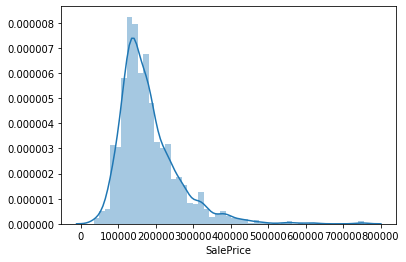

In [11]:
sns.distplot(house['SalePrice'])
plt.show()

In [12]:
house['SalePrice'].skew()

1.8828757597682129

### Derived Fields

In [13]:
# creating a new col IsRemod - 1 if remodelled after built else 0
def checkRemodStatus(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    else:
        return 1
    
house['IsRemod'] = house.apply(checkRemodStatus, axis=1)
house['IsRemod']= house['IsRemod'].astype('object')
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Converting given dates(in years) as YearBuilt, YrSold, GarageYrBlt, YearRemodAdd to number of years from today by adding new cols as BuiltDays, LastSoldDays, GarageDays, LastRemodDays respectively

In [14]:
house['BuiltAge'] = pd.datetime.now().year - house['YearBuilt']
house['LastSoldAge'] = pd.datetime.now().year - house['YrSold']
house['GarageAge'] = pd.datetime.now().year - house['GarageYrBlt']
house['LastRemodAge'] = pd.datetime.now().year - house['YearRemodAdd']

In [15]:
house[['BuiltAge','LastSoldAge', 'GarageAge', 'LastRemodAge']].describe()

BuiltAge  LastSoldAge    GarageAge  LastRemodAge
count  1460.000000  1460.000000  1379.000000   1460.000000
mean     49.732192    13.184247    42.493836     36.134247
std      30.202904     1.328095    24.689725     20.645407
min      11.000000    11.000000    11.000000     11.000000
25%      21.000000    12.000000    19.000000     17.000000
50%      48.000000    13.000000    41.000000     27.000000
75%      67.000000    14.000000    60.000000     54.000000
max     149.000000    15.000000   121.000000     71.000000

In [16]:
house[['BuiltAge','LastSoldAge', 'GarageAge', 'LastRemodAge']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
BuiltAge        1460 non-null int64
LastSoldAge     1460 non-null int64
GarageAge       1379 non-null float64
LastRemodAge    1460 non-null int64
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [17]:
house[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','BuiltAge','LastSoldAge','GarageAge','LastRemodAge']].head(10)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  BuiltAge  LastSoldAge  \
0       2003          2003       2003.0    2008        18           13   
1       1976          1976       1976.0    2007        45           14   
2       2001          2002       2001.0    2008        20           13   
3       1915          1970       1998.0    2006       106           15   
4       2000          2000       2000.0    2008        21           13   
5       1993          1995       1993.0    2009        28           12   
6       2004          2005       2004.0    2007        17           14   
7       1973          1973       1973.0    2009        48           12   
8       1931          1950       1931.0    2008        90           13   
9       1939          1950       1939.0    2008        82           13   

   GarageAge  LastRemodAge  
0       18.0            18  
1       45.0            45  
2       20.0            19  
3       23.0            51  
4       21.0            21  
5       28.0            26  
6       17.0            16  
7       48.0            48  
8       90.0            71  
9       82.0            71

In [18]:
# dropping actual year cols
house = house.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

**Insight** -
- 4 Columns are removed from Original dataframe i.e. 'YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'
- 5 new columns are added to Original Dataframe i.e. 'IsRemod','BuiltAge','LastSoldAge','GarageAge','LastRemodAge'

#### Missing Value Check and Data Correction

In [19]:
house.Id.nunique()

1460

In [20]:
# Dropping ID column as all are unique and not needed for prediction
house.drop('Id', axis=1, inplace=True)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4          Gd             9        Typ           1          TA  

In [21]:
house.MSSubClass.dtype

dtype('int64')

In [22]:
# As per data definition MSSubClass-Identifies the type of dwelling involved in the sale.
# datatype should be categorical and not integer. Changeing the datatype of the resp. col
house.MSSubClass=house.MSSubClass.astype('object')
house.MSSubClass.dtype

dtype('O')

In [23]:
# checking the unique value of col Alley
house.Alley.value_counts(normalize=True)

Grvl    0.549451
Pave    0.450549
Name: Alley, dtype: float64

In the given dataset NA = No alley access. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Alley'

In [24]:
house['Alley'].fillna('No Alley', inplace=True)
house.Alley.isnull().sum()

0

In [25]:
house.Alley.value_counts()

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [26]:
house.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In the given dataset NA = No Basement. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Basement'

In [27]:
house['BsmtQual'].fillna('No Basement', inplace=True)
house.BsmtQual.isnull().sum()

0

In [28]:
house.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [29]:
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [30]:
house['BsmtCond'].fillna('No Basement', inplace=True)
house.BsmtCond.isnull().sum()

0

In [31]:
house.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [32]:
house.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [33]:
house['BsmtExposure'].fillna('No Basement', inplace=True)
house.BsmtExposure.isnull().sum()

0

In [34]:
house.BsmtExposure.value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [35]:
house.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [36]:
house['BsmtFinType1'].fillna('No Basement', inplace=True)
house.BsmtFinType1.value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [37]:
house['BsmtFinType2'].fillna('No Basement', inplace=True)
house.BsmtFinType2.value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In the given dataset NA = No Fireplace. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Fireplace'

In [38]:
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house.FireplaceQu.value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In the given dataset NA = No Garage. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Garage'

In [39]:
house['GarageType'].fillna('No Garage', inplace=True)
house.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [40]:
house['GarageFinish'].fillna('No Garage', inplace=True)
house.GarageFinish.value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [41]:
house['GarageQual'].fillna('No Garage', inplace=True)
house.GarageQual.value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64

In [42]:
house['GarageCond'].fillna('No Garage', inplace=True)
house.GarageCond.value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In the given dataset NA = No Pool. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Pool'

In [43]:
house['PoolQC'].fillna('No Pool', inplace=True)
house.PoolQC.value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In the given dataset NA = No Fence. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Fence'

In [44]:
house['Fence'].fillna('No Fence', inplace=True)
house.Fence.value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In the given dataset NA = None. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'None'

In [45]:
house['MiscFeature'].fillna('None', inplace=True)
house.MiscFeature.value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [46]:
# Checking cols with missing values
round(house.isnull().sum()/len(house.index),2)[round(house.isnull().sum()/len(house.index),2).values>0]

LotFrontage    0.18
MasVnrType     0.01
MasVnrArea     0.01
GarageAge      0.06
dtype: float64

In [47]:
house.columns[house.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageAge'], dtype='object')

**Insight** -
- Identified few reference fields to be used for deriving new field
- Col with improper datatype were mapped to correct datatype
- NA were replaced with real values as given in data definition sheet, wherever required

#### Missing Values Imputation

In [48]:
house.isnull().sum().sort_values(ascending=False)[:5]

LotFrontage    259
GarageAge       81
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [49]:
house.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

LotFrontage is Linear feet of street connected to property. It is safe to replace NA with minimum value assuming it's legal compliance needs to be followed by owner/builder.

In [50]:
house['LotFrontage'].fillna(house['LotFrontage'].min(), inplace=True)
house.LotFrontage.describe()

count    1460.00000
mean       61.34863
std        28.92032
min        21.00000
25%        42.00000
50%        63.00000
75%        79.00000
max       313.00000
Name: LotFrontage, dtype: float64

In [51]:
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

MasVnrType is Masonry veneer type. We will replace the missing values with mode i.e. None

In [52]:
house['MasVnrType'].fillna('None', inplace=True)
house.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [53]:
house.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

MasVnrArea is Masonry veneer area in square feet. It's safe to replace missing values with minimum value

In [54]:
house['MasVnrArea'].fillna(house['MasVnrArea'].min(), inplace=True)
house.MasVnrArea.describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [55]:
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Electrical is Electrical system in the house. As, there is only 1 missing value it's better to drop that row

In [56]:
house = house[house['Electrical'].notna()]
house['Electrical'].isnull().sum()

0

In [57]:
# checking the shape after dropping one row
house.shape

(1459, 81)

In [58]:
# Replacing NaN with -1 as these houses donot have garage
house.GarageAge.fillna(-1,inplace=True)

In [59]:
# checking the null values in cols post imputation
house.isnull().sum().sort_values(ascending=False)[:5]

LastRemodAge    0
Electrical      0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
dtype: int64

In [60]:
# checking null values in rows post imputation
house.isnull().sum(axis=1).sort_values(ascending=False)[:5]

1459    0
478     0
480     0
481     0
482     0
dtype: int64

In [61]:
len(house.columns)

81

### Exploratory Data Analysis (EDA)

In [62]:
# separating numerical and categorical columns

types_df = house.dtypes #type of each feature in dataset: int, float, object
types_df.value_counts()

object     45
int64      33
float64     3
dtype: int64

In [63]:
# output col
out_col = 'SalePrice'

# numerical col
num_col = list((types_df[(types_df == 'int64') | (types_df == 'float64')]).index)
print(len(num_col))

# categorical col
cat_col = list((types_df[types_df == object]).index) 
print(len(cat_col))

36
45


In [64]:
# function to plot numerical data
def num_col_analysis(features, rows, cols):
    fig=plt.figure(figsize=(20,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.scatterplot(x=feature,y='SalePrice',data=house)
        plt.xticks(rotation = 45)
        ax.set_title(feature+" v/s SalePrice",color='red')
       
    fig.tight_layout()  
    plt.show()

In [65]:
# function to plot categorical data
def cat_col_analysis(features, rows, cols):
    fig=plt.figure(figsize=(20,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(x=feature,y='SalePrice',data=house)
        plt.xticks(rotation = 90)
        ax.set_title("Boxplot for " + feature,color='blue')
       
    fig.tight_layout()  
    plt.show()

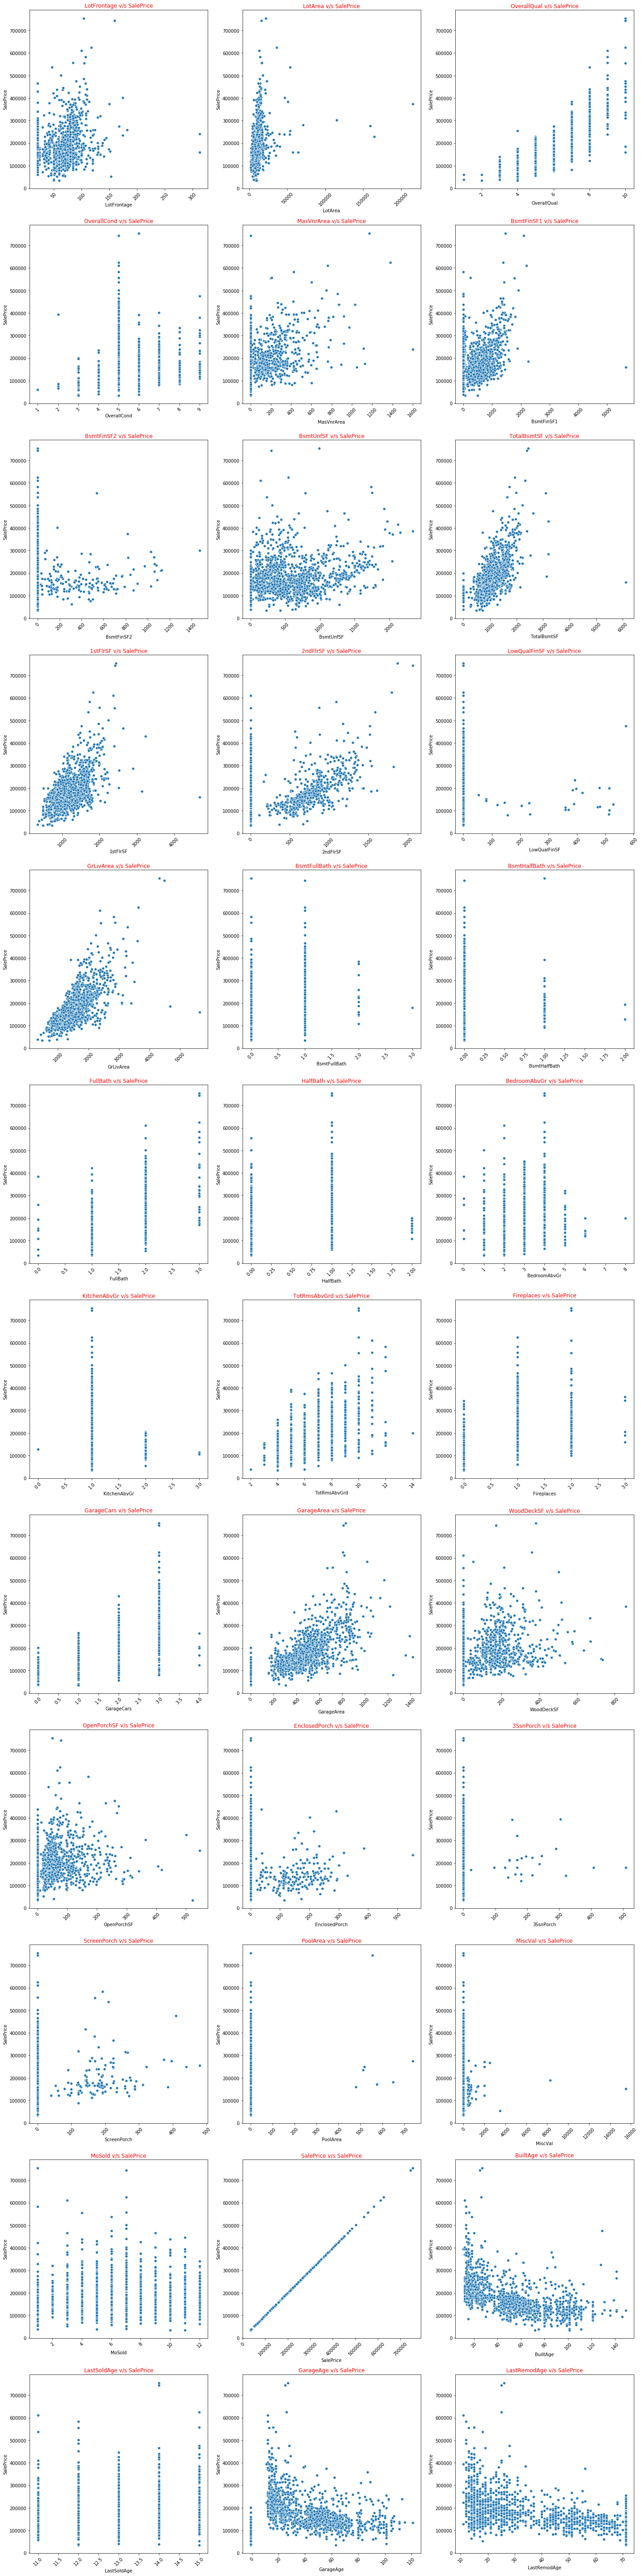

In [66]:
# plotting numerical col for analysis
num_col_analysis(num_col,12, 3)

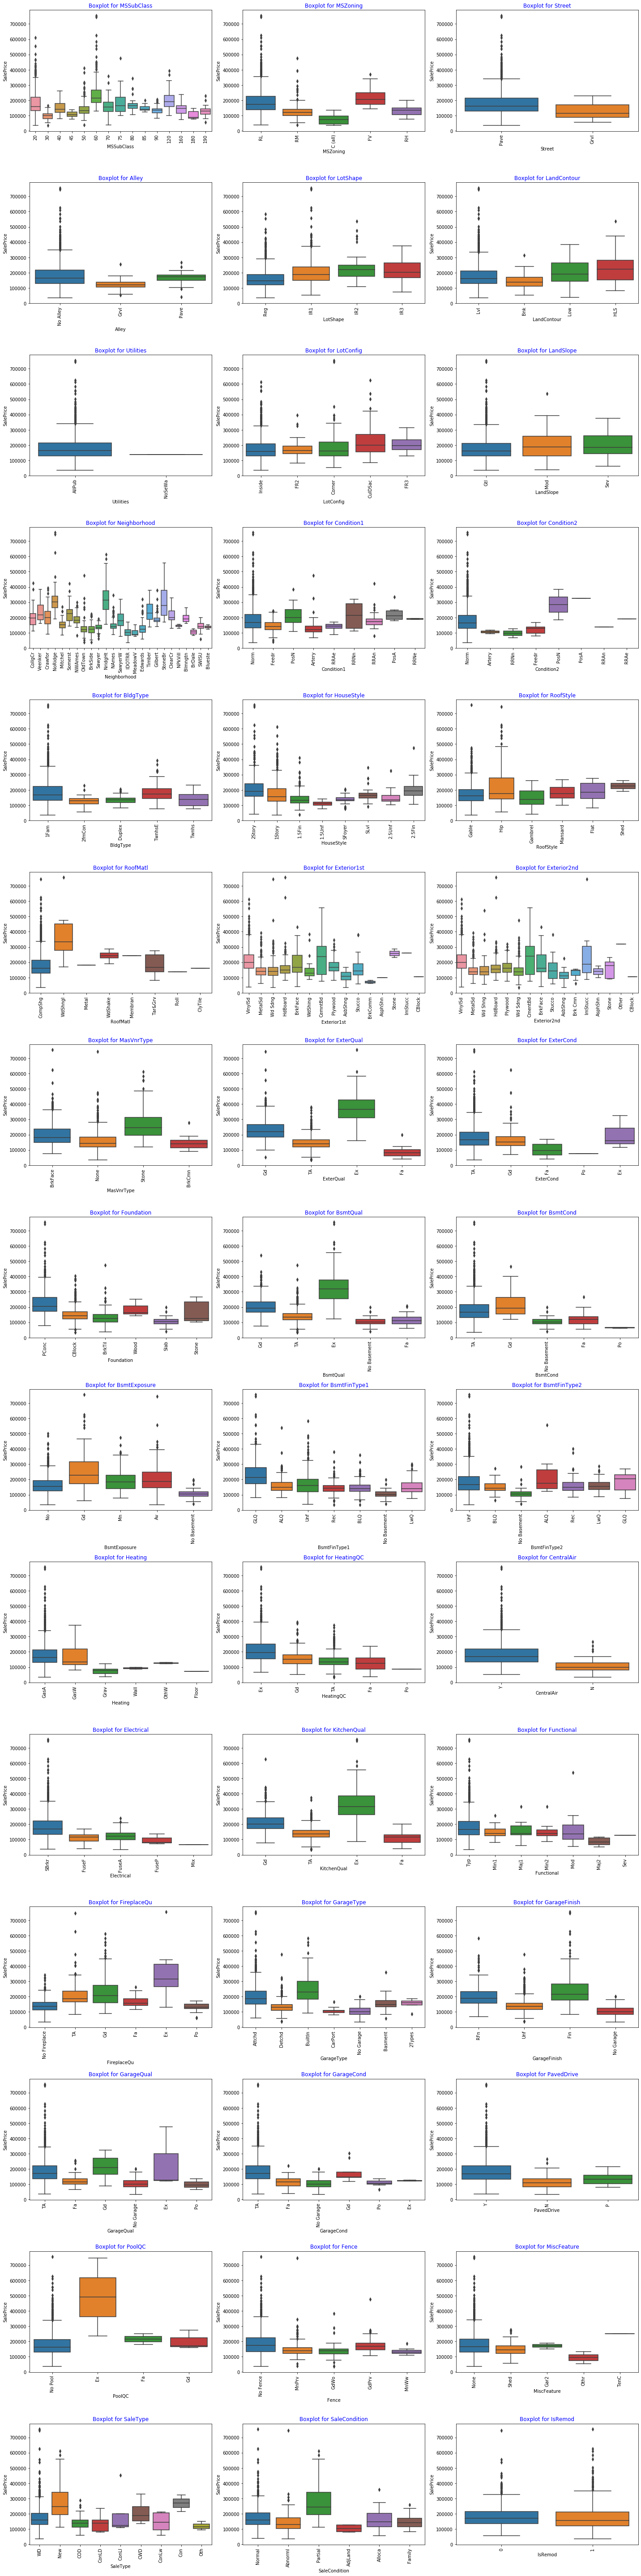

In [67]:
# plotting categorical col for analysis
cat_col_analysis(cat_col,15, 3)

**Insights**  
Numerica Col Analysis  
- Sale price is also increasing with more cars in garages
- Sale price increasing with OverallQual
- Sale price increasing with more fireplace and more rooms
- Sale price increasing with max FullBath: Full bathrooms above grade
  
Categorical Col Analysis  
- Median SalePrice for SaleCondition as Partial is higher than others
- Median SalePrice for IsRemod as No(0) is slighty higher than IsRemod as Yes (1)
- Median SalePrice for Fence as MnWw is least than others
- Median SalePrice for GarageFinish as Fin is higher than others
- Median SalePrice for GarageType as BuiltIn is higher than others

**Dropping variables with least variance i.e occurence of single value >= 85% of entire dataset (col.value_count.max >= 0.85*1459)**

In [68]:
# function to get list of cols with least variance
def getLowVarianceCol():
    column = []
    for col in (house.columns):
        if(house[col].value_counts().max() >= (0.85*len(house))):
            column.append(col)
    return column

colsToDrop = getLowVarianceCol()
colsToDrop

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal',
 'SaleType']

In [69]:
house.drop(colsToDrop, axis = 1, inplace = True)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr   
1         20       RL         80.0     9600      Reg       FR2      Veenker   
2         60       RL         68.0    11250      IR1    Inside      CollgCr   
3         70       RL         60.0     9550      IR1    Corner      Crawfor   
4         60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ         706        150          856        Ex   
1           Gd          ALQ         978        284         1262        Ex   
2           Mn          GLQ         486        434          920        Ex   
3           No          ALQ         216        540          756        Gd   
4           Av          GLQ         655        490         1145        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces   FireplaceQu  \
0             3          Gd             8           0  No Fireplace   
1             3          TA             6           1            TA   
2             3          Gd             6           1            TA   
3             3          Gd             7           1            Gd   
4             4          Gd             9           1            TA   

  GarageType GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     Attchd          RFn           2         548           0           61   
1     Attchd          RFn           2         460         298            0   
2     Attchd          RFn           2         608           0           42   
3     Detchd          Unf           3         642           0           35   
4     Attchd          RFn           3         836         192           84   

      Fence  MoSold SaleCondition  SalePrice IsRemod  BuiltAge  LastSoldAge  \
0  No Fence       2        Normal     208500       0        18           13   
1  No Fence       5        Normal     181500       0        45           14   
2  No Fence       9        Normal     223500       1        20           13   
3  No Fence       2       Abnorml     140000       1       106           15   
4  No Fence      12        Normal     250000       0        21           13   

   GarageAge  LastRemodAge  
0       18.0            18  
1       45.0            45  
2       20.0            19  
3       23.0            51  
4       21.0            21

In [70]:
len(house.columns)

51

In [71]:
# updated numerical column
num_col = list((house.columns[house.dtypes != object])) 
num_col

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'SalePrice',
 'BuiltAge',
 'LastSoldAge',
 'GarageAge',
 'LastRemodAge']

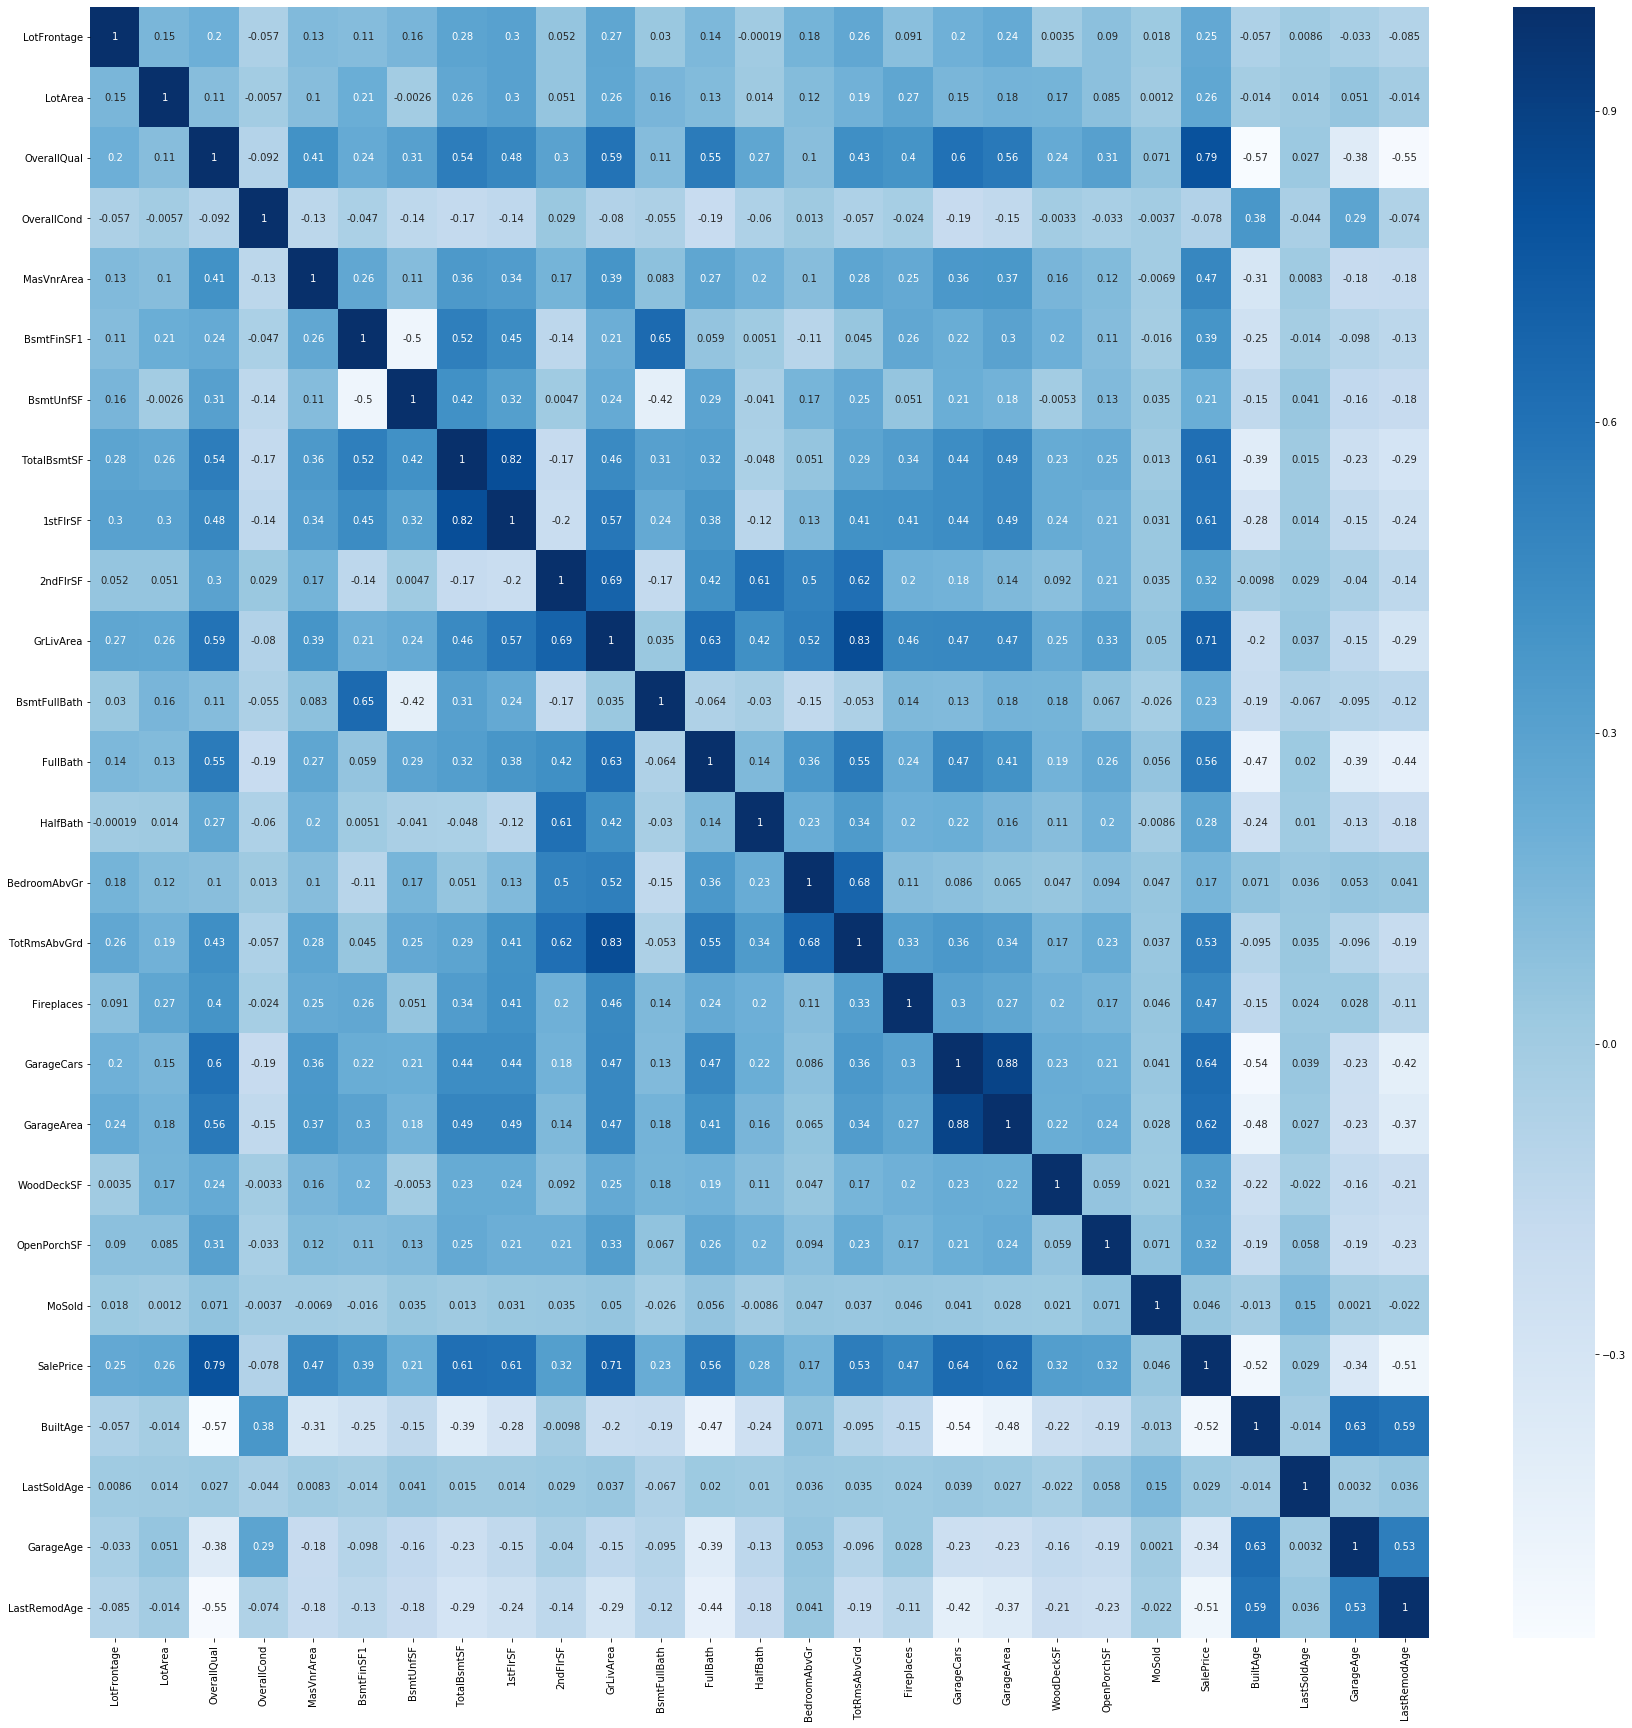

In [72]:
# checking correlation of numerical column
plt.figure(figsize = (30, 30))
sns.heatmap(house[num_col].corr(), annot = True, cmap="Blues")
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Removing following columns which shows high correlation between dependent variables (>0.80)

- TotalBsmtSF and 1stFlrSF shows 0.82
- Garage Area and Garage Cars shows 0.88
- TotRmsAbvGrd and GrLivArea shows 0.83

In [73]:
house.drop(['GarageArea','TotRmsAbvGrd','1stFlrSF'], axis = 1, inplace = True)

In [74]:
house.shape

(1459, 48)

#### Transforming Target Variable

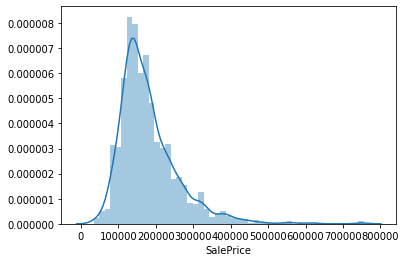

In [75]:
sns.distplot(house['SalePrice'])
plt.show()

In [76]:
house['SalePrice'].skew()

1.8819429948035529

Linear Regression do not work with outliers. As the target variable is highly skewed it means it has outliers. We need to normalize the skewness to make our model effective. 
Hence, we will do log transformation of target variable. 

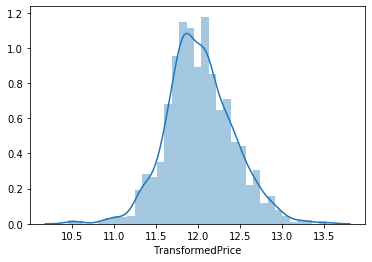

In [77]:
house['TransformedPrice'] = np.log(house['SalePrice'])
sns.distplot(house['TransformedPrice'])
plt.show()

In [78]:
house['TransformedPrice'].skew()

0.12131775882415026

#### Data Preparation

Converting the ordinal type categorical columns using label encoder

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [80]:
house.ExterQual = le.fit_transform(house.ExterQual)
house.ExterQual.value_counts(ascending=False)

3    905
2    488
0     52
1     14
Name: ExterQual, dtype: int64

In [81]:
house['BsmtQual'] = house.BsmtQual.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house.BsmtQual.value_counts(ascending=False)

3    649
4    617
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

In [82]:
house['BsmtExposure'] = house.BsmtExposure.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house.BsmtExposure.value_counts(ascending=False)

1    952
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64

In [83]:
house['BsmtFinType1'] = house.BsmtFinType1.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house.BsmtFinType1.value_counts(ascending=False)

1    429
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [84]:
house['HeatingQC'] = house.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house.HeatingQC.value_counts(ascending=False)

4    741
2    428
3    240
1     49
0      1
Name: HeatingQC, dtype: int64

In [85]:
house['KitchenQual'] = house.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house.KitchenQual.value_counts(ascending=False)

2    735
3    585
4    100
1     39
Name: KitchenQual, dtype: int64

In [86]:
house['FireplaceQu'] = house.FireplaceQu.map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house.FireplaceQu.value_counts(ascending=False)

0    689
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [87]:
house.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [88]:
# before creating dummy variables, updating list of cat_col to exclude encoded ordinal cols
cat_col = list((house.columns[house.dtypes == object])) 
print(len(cat_col),'\n')
print(cat_col)

17 

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition', 'IsRemod']


**Creating Dummy for categorical variable**

In [89]:
dummy_col =  pd.get_dummies(house[cat_col],drop_first=True)
house = pd.concat([house,dummy_col],axis=1)

# dropping actual col 
house.drop(cat_col,axis=1,inplace=True)
house.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0         65.0     8450            7            5       196.0          2   
1         80.0     9600            6            8         0.0          3   
2         68.0    11250            7            5       162.0          2   
3         60.0     9550            7            5         0.0          3   
4         84.0    14260            8            5       350.0          2   

   BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         4             1             6         706        150          856   
1         4             4             5         978        284         1262   
2         4             2             6         486        434          920   
3         3             1             5         216        540          756   
4         4             3             6         655        490         1145   

   HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0          4       854       1710             1         2         1   
1          4         0       1262             0         2         0   
2          4       866       1786             1         2         1   
3          3       756       1717             1         1         0   
4          4      1053       2198             1         2         1   

   BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  GarageCars  WoodDeckSF  \
0             3            3           0            0           2           0   
1             3            2           1            3           2         298   
2             3            3           1            3           2           0   
3             3            3           1            4           3           0   
4             4            3           1            3           3         192   

   OpenPorchSF  MoSold  SalePrice  BuiltAge  LastSoldAge  GarageAge  \
0           61       2     208500        18           13       18.0   
1            0       5     181500        45           14       45.0   
2           42       9     223500        20           13       20.0   
3           35       2     140000       106           15       23.0   
4           84      12     250000        21           13       21.0   

   LastRemodAge  TransformedPrice  MSSubClass_30  MSSubClass_40  \
0            18         12.247694              0              0   
1            45         12.109011              0              0   
2            19         12.317167              0              0   
3            51         11.849398              0              0   
4            21         12.429216              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0               0               0     

In [90]:
house.shape

(1459, 153)

### Train-Test Split

In [91]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(house, test_size = 0.3, random_state = 42)

In [92]:
df_train.shape

(1021, 153)

In [93]:
df_test.shape

(438, 153)

In [94]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 153 entries, LotFrontage to IsRemod_1
dtypes: float64(4), int32(1), int64(27), uint8(121)
memory usage: 582.9 KB


In [95]:
# updating list of numerical columns
num_col =list((house.dtypes[house.dtypes != np.uint8]).index)
num_col.remove('TransformedPrice')
num_col.remove('SalePrice')
print(num_col)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'BuiltAge', 'LastSoldAge', 'GarageAge', 'LastRemodAge']


#### Scaling of train and test dataset

In [96]:
scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [97]:
df_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
135       0.67473 -0.020006      0.64319     0.416829    1.065330   0.670264   
1452     -0.91512 -0.638544     -0.82429    -0.494482   -0.127521   0.670264   
1046      0.85138  0.500209      2.11067    -0.494482    0.606542  -0.752479   
691       1.52265  1.004145      2.84441     0.416829    6.123478  -3.597964   
435      -0.63248  0.004551      0.64319     0.416829   -0.586309  -0.752479   

      BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
135  -0.533302     -0.587292     -1.214901   -0.966615   1.643360   
1452  0.577925      2.210336      1.146892    0.210650  -1.286379   
1046  1.689151      1.277793      1.146892   -0.450082   2.649897   
691   1.689151      2.210336      1.146892    2.164868   0.935640   
435   0.577925      1.277793      1.146892   -0.138010  -1.129107   

      TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
135      0.533770  -0.157974 -0.795438   0.310528     -0.829310  0.787445   
1452    -1.158455  -0.157974 -0.795438  -0.861238      1.108277 -1.065046   
1046     2.071750   0.889374  1.215725   2.588747     -0.829310  2.639936   
691      3.082167   0.889374  3.502390   5.370249     -0.829310  2.639936   
435     -0.595125   0.889374  1.119299   0.270188      1.108277  0.787445   

      HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
135  -0.767504      0.143188    -0.772583    0.600163     1.198128   
1452 -0.767504     -1.075104    -0.772583   -0.947226    -1.005003   
1046  1.231531      1.361480     2.249668    0.600163     1.198128   
691   1.231531      1.361480     2.249668    2.147552     1.748911   
435   1.231531      0.143188     0.738542    0.600163     0.647345   

      GarageCars  WoodDeckSF  OpenPorchSF    MoSold  SalePrice  BuiltAge  \
135     0.290659    0.040535    -0.709823 -0.495751     174000  0.054393   
1452    0.290659   -0.734969    -0.299767 -0.495751     145000 -1.098468   
1046    1.645741    0.958479     0.871819  0.254118     556581 -1.098468   
691     1.645741    2.287914     0.022419 -1.995488     755000 -0.736140   
435     0.290659    0.515334     0.183512 -0.870685     212000 -0.802018   

      LastSoldAge  GarageAge  LastRemodAge  TransformedPrice  MSSubClass_30  \
135     -0.150096   0.409846      0.710452         12.066811              0   
1452     1.352336  -0.931225     -0.973103         11.884489              0   
1046     1.352336  -0.931225     -1.021204         13.229568              0   
691      0.601120  -0.509746     -0.492087         13.534473              0   
435     -0.901312  -0.586378     -0.540189         12.264342              0   

      MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
135               0              0              0              0   
1452              0              0              0              0   
1046              0              0              0              1   
691               0              0              0              1   
435               0              0              0              1   

      MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
135               0              0              0              0   
1452              0              0              0              0   
1046              0              0              0              0   
691               0              0              0              0   
435               0              0              0              0   

      MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
135               0               0               0               0   
1452              0               0               0               1   
1046              0               0               0               0   
691               0               0               0               0   
435               0               0               0               0   

      MSSubClass_190  MSZoning_FV  MSZoning_RH  M

In [98]:
df_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
1321     -1.40974 -0.367031    -2.291769     0.416829   -0.586309   0.670264   
836       1.02803 -0.231551    -0.824290     0.416829   -0.586309   0.670264   
413      -0.17319 -0.152451    -0.824290     0.416829   -0.586309   0.670264   
522      -0.38517 -0.516676    -0.090550     1.328141   -0.586309   0.670264   
1035     -1.40974  0.081167    -1.558029    -2.317105   -0.586309   0.670264   

      BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
1321 -3.866981     -1.519834     -1.687259   -0.966615  -1.286379   
836  -0.533302     -0.587292     -0.270184   -0.239164   1.456882   
413  -0.533302     -0.587292     -1.214901   -0.966615   0.978328   
522  -0.533302     -0.587292      0.674534   -0.107879   0.072894   
1035 -3.866981     -1.519834     -1.687259   -0.966615  -1.286379   

      TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
1321    -2.381239  -1.205323 -0.795438  -1.537404     -0.829310 -1.065046   
836      1.103806  -0.157974 -0.795438   0.074254      1.108277 -1.065046   
413     -0.127919  -0.157974 -0.795438  -0.945758     -0.829310 -1.065046   
522     -0.136861   0.889374  0.719822   0.275951     -0.829310  0.787445   
1035    -2.381239   0.889374 -0.795438  -1.297288     -0.829310 -1.065046   

      HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
1321 -0.767504     -1.075104    -0.772583   -0.947226    -1.005003   
836  -0.767504     -1.075104    -0.772583   -0.947226    -1.005003   
413  -0.767504     -1.075104    -0.772583    0.600163     1.198128   
522  -0.767504      0.143188    -0.772583    2.147552     1.198128   
1035 -0.767504      0.143188    -0.772583   -0.947226    -1.005003   

      GarageCars  WoodDeckSF  OpenPorchSF    MoSold  SalePrice  BuiltAge  \
1321   -1.064423   -0.734969    -0.709823  0.254118      72500  0.746109   
836     0.290659   -0.734969     0.988978 -0.120816     153500  0.779048   
413     0.290659   -0.734969    -0.709823 -1.245619     115000  1.470765   
522     0.290659   -0.734969    -0.358347  1.378921     159000  0.811987   
1035   -1.064423    0.736906    -0.709823 -1.995488      84000  0.482598   

      LastSoldAge  GarageAge  LastRemodAge  TransformedPrice  MSSubClass_30  \
1321    -0.150096   0.984590      1.672484         11.191342              0   
836      0.601120   1.252805      0.566147         11.941456              1   
413     -1.652528   2.057447      1.672484         11.652687              1   
522      1.352336   1.176172      1.672484         11.976659              0   
1035    -0.901312   0.907958      1.335773         11.338572              0   

      MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
1321              0              0              0              0   
836               0              0              0              0   
413               0              0              0              0   
522               0              0              1              0   
1035              0              0              0              0   

      MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
1321              0              0              0              0   
836               0              0              0              0   
413               0              0              0              0   
522               0              0              0              0   
1035              0              0              0              0   

      MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
1321              0               0               0               0   
836               0               0               0               0   
413               0               0               0               0   
522               0               0               0               0   
1035              0               0               0               0   

      MSSubClass_190  MSZoning_FV  MSZoning_RH  M

In [99]:
# splitting the dependent and independent variable
y_train = df_train.pop('TransformedPrice')
df_train.pop('SalePrice')
X_train = df_train

X_train.shape

(1021, 151)

In [100]:
y_test = df_test.pop('TransformedPrice')
df_test.pop('SalePrice')
X_test = df_test

X_test.shape

(438, 151)

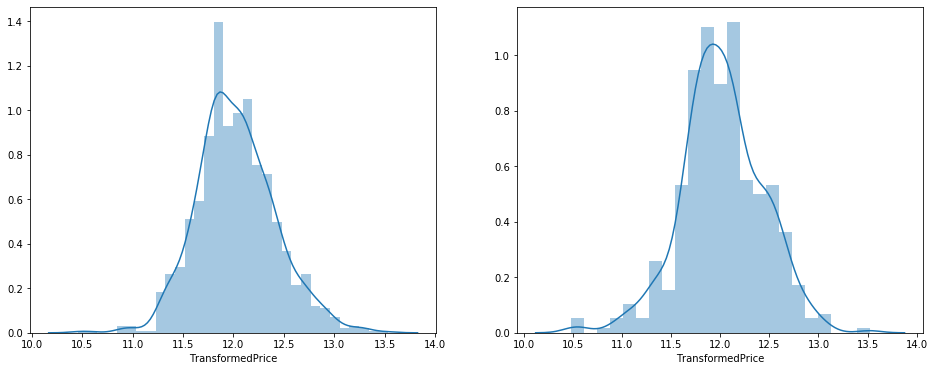

In [101]:
# check the distribution after scaling
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(y_train)
plt.subplot(122)
sns.distplot(y_test)
plt.show()

## Model Building and Evaluation

### Simple Linear Regression (SLR)

In [102]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
# running RFE with 70 features
rfe = RFE(lm, 70)             
rfe = rfe.fit(X_train, y_train)

In [104]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [105]:
rfe_scores.sort_values(by = ['Rank'])

Column_Names  Status  Rank
75     Neighborhood_Somerst    True     1
149   SaleCondition_Partial    True     1
120      Exterior2nd_Stucco    True     1
70     Neighborhood_NridgHt    True     1
69     Neighborhood_NoRidge    True     1
123     Exterior2nd_Wd Shng    True     1
64     Neighborhood_MeadowV    True     1
61     Neighborhood_Edwards    True     1
60     Neighborhood_Crawfor    True     1
76     Neighborhood_StoneBr    True     1
128        Foundation_PConc    True     1
57     Neighborhood_BrkSide    True     1
53            LotConfig_FR3    True     1
52            LotConfig_FR2    True     1
129         Foundation_Slab    True     1
49             LotShape_IR3    True     1
48             LotShape_IR2    True     1
47              MSZoning_RM    True     1
46              MSZoning_RL    True     1
58     Neighborhood_ClearCr    True     1
45              MSZoning_RH    True     1
77      Neighborhood_Timber    True     1
79          BldgType_2fmCon    True     1
113     Exterior2nd_CmentBd    True     1
109     Exterior2nd_AsphShn    True     1
104       Exterior1st_Stone    True     1
117       Exterior2nd_Other    True     1
101     Exterior1st_ImStucc    True     1
98       Exterior1st_CBlock    True     1
97      Exterior1st_BrkFace    True     1
96      Exterior1st_BrkComm    True     1
78     Neighborhood_Veenker    True     1
95      Exterior1st_AsphShn    True     1
93        RoofStyle_Mansard    True     1
90          RoofStyle_Gable    True     1
87        HouseStyle_2Story    True     1
119       Exterior2nd_Stone    True     1
84        HouseStyle_1Story    True     1
82          BldgType_TwnhsE    True     1
81           BldgType_Twnhs    True     1
80          BldgType_Duplex    True     1
94           RoofStyle_Shed    True     1
44              MSZoning_FV    True     1
56      Neighborhood_BrDale    True     1
112      Exterior2nd_CBlock    True     1
6                  BsmtQual    True     1
7              BsmtExposure    True     1
8              BsmtFinType1    True     1
146    SaleCondition_Alloca    True     1
145   SaleCondition_AdjLand    True     1
12                HeatingQC    True     1
14                GrLivArea    True     1
131         Foundation_Wood    True     1
21              FireplaceQu    True     1
22               GarageCars    True     1
148    SaleCondition_Normal    True     1
137    GarageType_No Garage    True     1
26                 BuiltAge    True     1
136       GarageType_Detchd    True     1
134      GarageType_BuiltIn    True     1
138  GarageFinish_No Garage    True     1
133      GarageType_Basment    True     1
2               OverallQual    True     1
39            MSSubClass_90    True     1
132       GarageType_Attchd    True     1
36            MSSubClass_75    True     1
30            MSSubClass_30    True     1
35            MSSubClass_70    True     1
3               OverallCond    True     1
32            MSSubClass_45    True     1
72       Neighborhood_SWISU   False     2
16                 FullBath   False     3
92            RoofStyle_Hip   False     4
91        RoofStyle_Gambrel   False     5
17                 HalfBath   False     6
147    SaleCondition_Family   False     7
99      Exterior1st_CemntBd   False     8
15             BsmtFullBath   False     9
106     Exterior1st_VinylSd   False    10
67     Neighborhood_NPkVill   False    11
121     Exterior2nd_VinylSd   False    12
11              TotalBsmtSF   False    13
54         LotConfig_Inside   False    14
34            MSSubClass_60   False    15
114     Exterior2nd_HdBoard   False    16
107     Exterior1st_Wd Sdng   False    17
118     Exterior2nd_Plywood   False    18
111     Exterior2nd_BrkFace   False    19
1                   LotArea   False    20
135      GarageType_CarPort   False    21
19              KitchenQual   False    22
124      MasVnrType_BrkFace   False    23
125         MasVnrType_None   False    24
85        HouseStyle_2.5Fin   False    25
71     Neighborhood_OldTo

In [106]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
print(rfe_sel_columns)

['OverallQual', 'OverallCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'GrLivArea', 'FireplaceQu', 'GarageCars', 'BuiltAge', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exter

In [107]:
# filter the train and test set for the RFE selected columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

print(X_train.shape,'\n',X_test.shape)

(1021, 70) 
 (438, 70)


In [108]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.694251019135107
[ 6.70777642e-02  4.45237600e-02  2.75537192e-02  2.24970958e-02
  3.27692851e-02  2.42669189e-02  1.25933817e-01  2.79236120e-02
  5.46516905e-02 -5.50903885e-02 -1.22412909e-01 -6.07146630e-02
  4.27204342e-02  6.25337228e-02  4.71448902e+11  2.14615348e-01
  1.67529183e-01  1.80750882e-01  1.20036616e-01  7.79609120e-02
 -1.09279367e-01 -4.73803395e-02 -7.93951171e-02  4.18433366e-02
  6.18344397e-02  1.02429710e-01  1.46843596e-01 -5.70981617e-02
 -1.06182010e-01  1.37950978e-01  1.73200604e-01  6.32961061e-02
  2.06390872e-01  7.41251911e-02  1.35315124e-01 -3.69147720e-02
 -4.71448902e+11 -1.38273246e-01 -9.65869205e-02  3.42754938e-02
 -2.64316307e-02 -1.54664932e-02  1.42539171e-01 -1.15362072e-01
 -1.57005249e-02 -4.97723427e-01  1.15696537e-01  1.51859008e+10
  3.98709128e+07  5.48730298e-02  5.02569173e-02 -1.51859008e+10
  2.58012599e-02 -6.58775809e-02 -2.52953347e-02 -5.12082494e-02
 -4.10231798e-02  2.86254960e-02 -3.89035643e-02 -1.29246976e-01
  8.65

In [110]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8970158239160264
-20644750640630.0
16.040863141231014
1589689690297410.8
0.01571093353695496
3629428516660.7554


In [111]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

### Ridge Regression

In [112]:
ridge = Ridge(random_state=42)

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs=-1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   16.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [113]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=200]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])[:30]

param_alpha  mean_train_score  mean_test_score  rank_test_score
19           7         -0.087240        -0.094606                1
20           8         -0.087461        -0.094611                2
18           6         -0.087019        -0.094641                3
21           9         -0.087682        -0.094657                4
17           5         -0.086800        -0.094727                5
22          10         -0.087904        -0.094739                6
16           4         -0.086588        -0.094919                7
15           3         -0.086424        -0.095208                8
14           2         -0.086306        -0.095671                9
23          20         -0.090007        -0.095838               10
13           1         -0.086261        -0.096455               11
12         0.9         -0.086256        -0.096557               12
11         0.8         -0.086251        -0.096665               13
10         0.7         -0.086245        -0.096783               14
9          0.6         -0.086240        -0.096908               15
8          0.5         -0.086233        -0.097043               16
7          0.4         -0.086223        -0.097189               17
6          0.3         -0.086210        -0.097348               18
5          0.2         -0.086193        -0.097538               19
4          0.1         -0.086169        -0.097759               20
3         0.05         -0.086154        -0.097884               21
2         0.01         -0.086139        -0.097992               22
1        0.001         -0.086136        -0.098017               23
0       0.0001         -0.086136        -0.098020               24
24          50         -0.094105        -0.098522               25
25         100         -0.098158        -0.101707               26

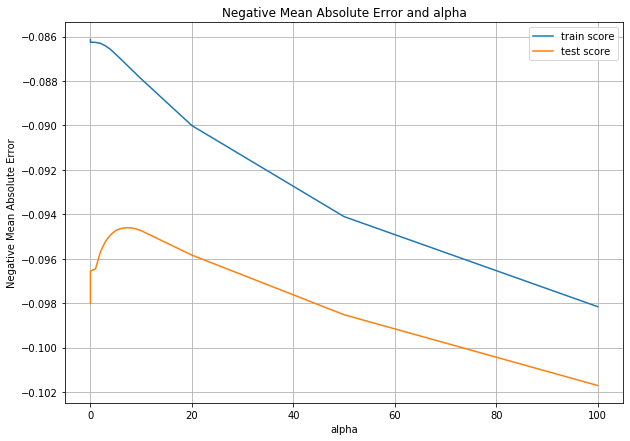

In [114]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(10,7))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and alpha')
plt.grid()
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [115]:
# get the best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=7.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='auto', tol=0.001)

In [116]:
# check the coefficient values with lambda = 7.0
alpha = 7.0
ridge = Ridge(random_state=42,alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.07717264,  0.04848009,  0.02887997,  0.02407687,  0.03215726,
        0.0222172 ,  0.12815616,  0.0309831 ,  0.05546514, -0.05293662,
       -0.09142148, -0.02440581,  0.0416066 ,  0.02926274, -0.01231647,
        0.06262622,  0.01620803,  0.04986599, -0.02526048,  0.06110753,
       -0.0676369 , -0.03457294, -0.02310996,  0.01173262,  0.04518464,
        0.07083092,  0.10994296, -0.05402648, -0.05301381,  0.08770583,
        0.12041632,  0.04974879,  0.1289151 ,  0.04120004,  0.05677751,
       -0.02818256, -0.01231647, -0.0939533 , -0.06964203,  0.03497408,
       -0.02329563, -0.01942024,  0.04184983, -0.01560582,  0.00210111,
       -0.06172165,  0.09980012, -0.01734824,  0.        ,  0.00511859,
        0.00707471, -0.01734824,  0.01707557, -0.00153489, -0.00098408,
       -0.03756825, -0.02691025,  0.03374577, -0.00787216, -0.03379969,
        0.04034956,  0.0087184 ,  0.02552115,  0.01699529,  0.0001366 ,
        0.0001366 ,  0.04072965,  0.08235846,  0.05145279,  0.07

In [117]:
# Check the mean squared error
mean_squared_error(y_test, ridge.predict(X_test))

0.018352250695376483

In [118]:
# Put the Features and coefficienst in a dataframe
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df['ABS Coefficients']=abs(ridge.coef_)
ridge_df.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient  ABS Coefficients
0     Neighborhood_StoneBr       0.1289          0.128915
1                GrLivArea       0.1282          0.128156
2     Neighborhood_NridgHt       0.1204          0.120416
3     Neighborhood_Crawfor       0.1099          0.109943
4      Exterior1st_BrkFace       0.0998          0.099800
5           BldgType_Twnhs      -0.0940          0.093953
6            MSSubClass_30      -0.0914          0.091421
7     Neighborhood_NoRidge       0.0877          0.087706
8     SaleCondition_Alloca       0.0824          0.082358
9              OverallQual       0.0772          0.077173
10   SaleCondition_Partial       0.0736          0.073627
11    Neighborhood_ClearCr       0.0708          0.070831
12         BldgType_TwnhsE      -0.0696          0.069642
13            LotShape_IR3      -0.0676          0.067637
14             MSZoning_FV       0.0626          0.062626
15     Exterior1st_BrkComm      -0.0617          0.061722
16            LotShape_IR2       0.0611          0.061108
17    Neighborhood_Veenker       0.0568          0.056778
18              GarageCars       0.0555          0.055465
19    Neighborhood_Edwards      -0.0540          0.054026
20    Neighborhood_MeadowV      -0.0530          0.053014
21                BuiltAge      -0.0529          0.052937
22    SaleCondition_Normal       0.0515          0.051453
23             MSZoning_RL       0.0499          0.049866
24    Neighborhood_Somerst       0.0497          0.049749
25             OverallCond       0.0485          0.048480
26    Neighborhood_BrkSide       0.0452          0.045185
27       RoofStyle_Mansard       0.0418          0.041850
28           MSSubClass_70       0.0416          0.041607
29     Neighborhood_Timber       0.0412          0.041200
30   SaleCondition_AdjLand       0.0407          0.040730
31       GarageType_Attchd       0.0403          0.040350
32      Exterior2nd_Stucco      -0.0376          0.037568
33       HouseStyle_1Story       0.0350          0.034974
34           LotConfig_FR2      -0.0346          0.034573
35         Foundation_Wood      -0.0338          0.033800
36        Foundation_PConc       0.0337          0.033746
37            BsmtFinType1       0.0322          0.032157
38             FireplaceQu       0.0310          0.030983
39           MSSubClass_75       0.0293          0.029263
40                BsmtQual       0.0289          0.028880
41         BldgType_2fmCon      -0.0282          0.028183
42     Exterior2nd_Wd Shng      -0.0269          0.026910
43      GarageType_BuiltIn       0.0255          0.025521
44             MSZoning_RM      -0.0253          0.025260
45           MSSubClass_45      -0.0244          0.024406
46            BsmtExposure       0.0241          0.024077
47       HouseStyle_2Story      -0.0233          0.023296
48           LotConfig_FR3      -0.0231          0.023110
49               HeatingQC       0.0222          0.022217
50         RoofStyle_Gable      -0.0194          0.019420
51      Exterior2nd_CBlock      -0.0173          0.017348
52      Exterior1st_CBlock      -0.0173          0.017348
53     Exterior2nd_CmentBd       0.0171          0.017076
54       GarageType_Detchd       0.0170          0.016995
55             MSZoning_RH       0.0162          0.016208
56          RoofStyle_Shed      -0.0156          0.015606
57         BldgType_Duplex      -0.0123          0.012316
58           MSSubClass_90      -0.0123          0.012316
59     Neighborhood_BrDale       0.0117          0.011733
60      GarageType_Basment       0.0087          0.008718
61         Foundation_Slab      -0.0079          0.007872
62     Exterior2nd_AsphShn       0.0071          0.007075
63       Exterior1st_Stone       0.0051          0.005119
64     Exterior1st_AsphShn       0.0021          0.002101
65       Exterior2nd_Other      -0.0015          0.001535
66       Exterior2nd_Stone      -0.0010          0.000984
67    GarageType_No Garage       0.0001          0.000137
68  GarageFinish

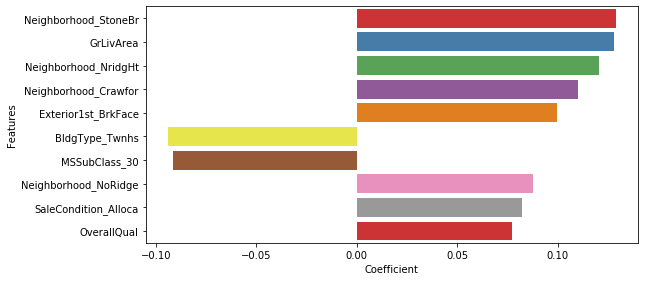

In [119]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(30,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = ridge_df.head(10))
plt.show()

In [120]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_ridge))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_ridge))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8911815272159666
0.8956095601384155
16.949615907429617
8.0382858045749
0.016600995012173964
0.018352250695376483


In [121]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# calculating Adjusted R-squared using the formula
adjusted_r2_ridge = 1-(1-r2_test_lr)*(n-1)/(n-p-1)
print('R2 Score for Ridge Regression         :',r2_test_lr)
print('Adjusted R2 Score for Ridge Regression:',adjusted_r2_ridge)

R2 Score for Ridge Regression         : 0.8956095601384155
Adjusted R2 Score for Ridge Regression: 0.8756985770585493


### Lasso Regression

In [122]:
lasso = Lasso(random_state=42)

params = {'alpha': np.arange(0, 1, 0.001).tolist()}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs=-1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 596 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 4496 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   19.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009000000000000001,
                                   0.01, 0.011, 0.012, 0.013000000000000001,
                                   0.014, 0.015, 0.016, 0.017,
                                   0.018000000000000002, 0.019, 0.02, 0.021,
                                   0.022, 0.023, 0.024, 0.025,
                                   0.026000000000000002, 0.027, 0.028, 0.029, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg

In [123]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=20]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])[:15]

param_alpha  mean_train_score  mean_test_score  rank_test_score
1        0.001         -0.089323        -0.096510                1
0            0         -0.086136        -0.098020                2
2        0.002         -0.094351        -0.099880                3
3        0.003         -0.097741        -0.102288                4
4        0.004         -0.100134        -0.104217                5
5        0.005         -0.101545        -0.105353                6
6        0.006         -0.102491        -0.106116                7
7        0.007         -0.103227        -0.106822                8
8        0.008         -0.104008        -0.107628                9
9        0.009         -0.104863        -0.108503               10
10        0.01         -0.105711        -0.109323               11
11       0.011         -0.106537        -0.110069               12
12       0.012         -0.107388        -0.110836               13
13       0.013         -0.108210        -0.111574               14
14       0.014         -0.109110        -0.112358               15

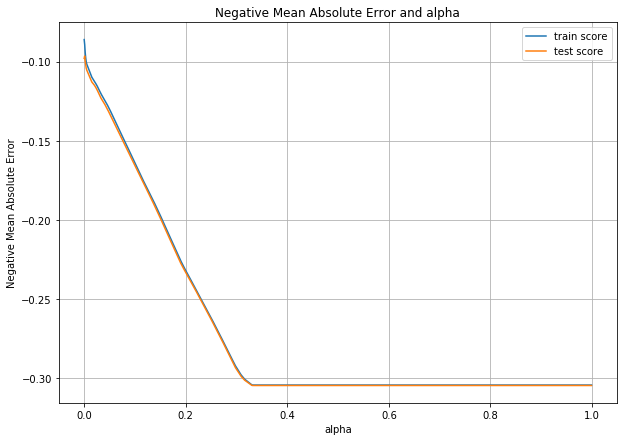

In [124]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.figure(figsize=(10,7))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.grid()
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [125]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [126]:
# check the coefficient values with lambda = 0.001

alpha = 0.001

lasso = Lasso(random_state=42, alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.08472583,  0.05074335,  0.030306  ,  0.02472532,  0.03084935,
        0.02238641,  0.12726359,  0.03205912,  0.05832899, -0.05029883,
       -0.08270124, -0.        ,  0.00651309,  0.        , -0.        ,
        0.03014668, -0.        ,  0.02628858, -0.046564  ,  0.03798802,
       -0.01141928, -0.00299511, -0.        ,  0.        ,  0.01851423,
        0.04536963,  0.10049658, -0.04597298, -0.        ,  0.05721379,
        0.10119709,  0.03520523,  0.11256508,  0.00386596,  0.        ,
       -0.        , -0.        , -0.08660539, -0.05797163,  0.03818424,
       -0.00885694, -0.01539858,  0.        , -0.        , -0.        ,
       -0.        ,  0.09749576, -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.03041671, -0.        , -0.        ,
        0.02586706,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.03434912,  0.05

In [127]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.018119267042785627

In [128]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso_df=pd.DataFrame()
lasso_df['Features'] = X_train.columns
lasso_df['Coefficients']=lasso.coef_
lasso_df['ABS Coefficients'] = abs(lasso.coef_)
lasso_df.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
lasso_df

Features  Coefficients  ABS Coefficients
6                GrLivArea      0.127264          0.127264
32    Neighborhood_StoneBr      0.112565          0.112565
30    Neighborhood_NridgHt      0.101197          0.101197
26    Neighborhood_Crawfor      0.100497          0.100497
46     Exterior1st_BrkFace      0.097496          0.097496
37          BldgType_Twnhs     -0.086605          0.086605
0              OverallQual      0.084726          0.084726
10           MSSubClass_30     -0.082701          0.082701
8               GarageCars      0.058329          0.058329
38         BldgType_TwnhsE     -0.057972          0.057972
29    Neighborhood_NoRidge      0.057214          0.057214
69   SaleCondition_Partial      0.055736          0.055736
1              OverallCond      0.050743          0.050743
9                 BuiltAge     -0.050299          0.050299
18             MSZoning_RM     -0.046564          0.046564
27    Neighborhood_Edwards     -0.045973          0.045973
25    Neighborhood_ClearCr      0.045370          0.045370
39       HouseStyle_1Story      0.038184          0.038184
19            LotShape_IR2      0.037988          0.037988
31    Neighborhood_Somerst      0.035205          0.035205
68    SaleCondition_Normal      0.034349          0.034349
7              FireplaceQu      0.032059          0.032059
4             BsmtFinType1      0.030849          0.030849
57        Foundation_PConc      0.030417          0.030417
2                 BsmtQual      0.030306          0.030306
15             MSZoning_FV      0.030147          0.030147
17             MSZoning_RL      0.026289          0.026289
60       GarageType_Attchd      0.025867          0.025867
3             BsmtExposure      0.024725          0.024725
5                HeatingQC      0.022386          0.022386
24    Neighborhood_BrkSide      0.018514          0.018514
41         RoofStyle_Gable     -0.015399          0.015399
20            LotShape_IR3     -0.011419          0.011419
40       HouseStyle_2Story     -0.008857          0.008857
12           MSSubClass_70      0.006513          0.006513
33     Neighborhood_Timber      0.003866          0.003866
21           LotConfig_FR2     -0.002995          0.002995
34    Neighborhood_Veenker      0.000000          0.000000
61      GarageType_Basment      0.000000          0.000000
55      Exterior2nd_Stucco     -0.000000          0.000000
56     Exterior2nd_Wd Shng     -0.000000          0.000000
58         Foundation_Slab     -0.000000          0.000000
59         Foundation_Wood     -0.000000          0.000000
16             MSZoning_RH     -0.000000          0.000000
62      GarageType_BuiltIn      0.000000          0.000000
53       Exterior2nd_Other     -0.000000          0.000000
63       GarageType_Detchd      0.000000          0.000000
64    GarageType_No Garage     -0.000000          0.000000
65  GarageFinish_No Garage     -0.000000          0.000000
66   SaleCondition_AdjLand      0.000000          0.000000
67    SaleCondition_Alloca      0.000000          0.000000
14           MSSubClass_90     -0.000000          0.000000
54       Exterior2nd_Stone     -0.000000          0.000000
52     Exterior2nd_CmentBd      0.000000          0.000000
36         BldgType_Duplex     -0.000000          0.000000
51      Exterior2nd_CBlock     -0.000000          0.000000
50     Exterior2nd_AsphShn      0.000000          0.000000
49       Exterior1st_Stone      0.000000          0.000000
48     Exterior1st_ImStucc      0.000000          0.000000
47      Exterior1st_CBlock     -0.000000          0.000000
22           LotConfig_FR3     -0.000000          0.000000
45     Exterior1st_BrkComm     -0.000000          0.000000
44     Exterior1st_AsphShn     -0.000000          0.000000
43          RoofStyle_Shed     -0.000000          0.000000
42       RoofStyle_Mansard      0.000000          0.000000
13           MSSubClass_75      0.000000          0.000000
23     Neighborhood_BrDale      0.000000          0.000000
11    

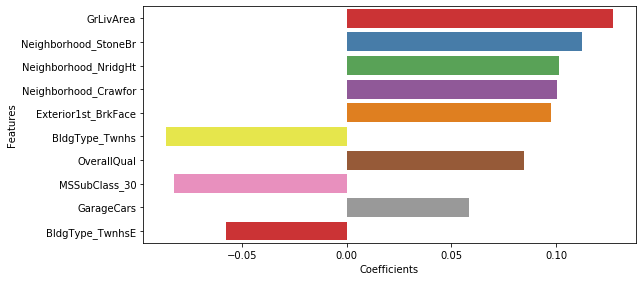

In [129]:
#bar plot to determine the variables that would affect pricing most using lasso regression
plt.figure(figsize=(30,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficients', palette='Set1', data = lasso_df.head(10))
plt.show()

In [130]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8832828514952754
0.8969348071818556
18.179917309552394
7.936238964740104
0.017805991488298135
0.018119267042785627


In [131]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# calculating Adjusted R-squared using the formula
adjusted_r2_lasso = 1-(1-r2_test_lr)*(n-1)/(n-p-1)
print('R2 Score for Ridge Regression         :',r2_test_lr)
print('Adjusted R2 Score for Ridge Regression:',adjusted_r2_lasso)

R2 Score for Ridge Regression         : 0.8969348071818556
Adjusted R2 Score for Ridge Regression: 0.8772765960176319


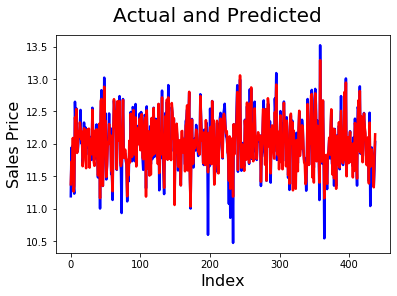

In [132]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_test_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label
plt.show()

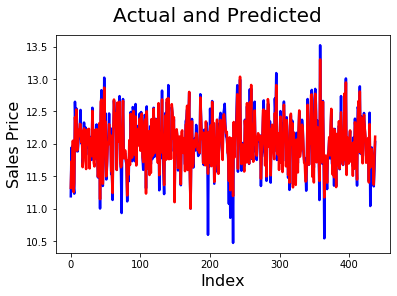

In [133]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_test_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label
plt.show()

**Insight** - From the above plot we can say that both the model (Ridge and Lasso) is able generalizing the pattern and is also not overfitting. Hence, we can conclude our model is aligned with Linear Regression Assumptions

In [134]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.970158e-01          0.891182          0.883283
1   R2 Score (Test)      -2.064475e+13          0.895610          0.896935
2       RSS (Train)       1.604086e+01         16.949616         18.179917
3        RSS (Test)       1.589690e+15          8.038286          7.936239
4       MSE (Train)       1.253433e-01          0.128845          0.133439
5        MSE (Test)       1.905106e+06          0.135470          0.134608

In [135]:
betas = pd.DataFrame(index=X_train.columns)

In [136]:
betas.rows = X_train.columns

In [137]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [138]:
pd.set_option('display.max_rows', None)
betas.head(70)

Linear     Ridge     Lasso
OverallQual             6.707776e-02  0.077173  0.084726
OverallCond             4.452376e-02  0.048480  0.050743
BsmtQual                2.755372e-02  0.028880  0.030306
BsmtExposure            2.249710e-02  0.024077  0.024725
BsmtFinType1            3.276929e-02  0.032157  0.030849
HeatingQC               2.426692e-02  0.022217  0.022386
GrLivArea               1.259338e-01  0.128156  0.127264
FireplaceQu             2.792361e-02  0.030983  0.032059
GarageCars              5.465169e-02  0.055465  0.058329
BuiltAge               -5.509039e-02 -0.052937 -0.050299
MSSubClass_30          -1.224129e-01 -0.091421 -0.082701
MSSubClass_45          -6.071466e-02 -0.024406 -0.000000
MSSubClass_70           4.272043e-02  0.041607  0.006513
MSSubClass_75           6.253372e-02  0.029263  0.000000
MSSubClass_90           4.714489e+11 -0.012316 -0.000000
MSZoning_FV             2.146153e-01  0.062626  0.030147
MSZoning_RH             1.675292e-01  0.016208 -0.000000
MSZoning_RL             1.807509e-01  0.049866  0.026289
MSZoning_RM             1.200366e-01 -0.025260 -0.046564
LotShape_IR2            7.796091e-02  0.061108  0.037988
LotShape_IR3           -1.092794e-01 -0.067637 -0.011419
LotConfig_FR2          -4.738034e-02 -0.034573 -0.002995
LotConfig_FR3          -7.939512e-02 -0.023110 -0.000000
Neighborhood_BrDale     4.184334e-02  0.011733  0.000000
Neighborhood_BrkSide    6.183444e-02  0.045185  0.018514
Neighborhood_ClearCr    1.024297e-01  0.070831  0.045370
Neighborhood_Crawfor    1.468436e-01  0.109943  0.100497
Neighborhood_Edwards   -5.709816e-02 -0.054026 -0.045973
Neighborhood_MeadowV   -1.061820e-01 -0.053014 -0.000000
Neighborhood_NoRidge    1.379510e-01  0.087706  0.057214
Neighborhood_NridgHt    1.732006e-01  0.120416  0.101197
Neighborhood_Somerst    6.329611e-02  0.049749  0.035205
Neighborhood_StoneBr    2.063909e-01  0.128915  0.112565
Neighborhood_Timber     7.412519e-02  0.041200  0.003866
Neighborhood_Veenker    1.353151e-01  0.056778  0.000000
BldgType_2fmCon        -3.691477e-02 -0.028183 -0.000000
BldgType_Duplex        -4.714489e+11 -0.012316 -0.000000
BldgType_Twnhs         -1.382732e-01 -0.093953 -0.086605
BldgType_TwnhsE        -9.658692e-02 -0.069642 -0.057972
HouseStyle_1Story       3.427549e-02  0.034974  0.038184
HouseStyle_2Story      -2.643163e-02 -0.023296 -0.008857
RoofStyle_Gable        -1.546649e-02 -0.019420 -0.015399
RoofStyle_Mansard       1.425392e-01  0.041850  0.000000
RoofStyle_Shed         -1.153621e-01 -0.015606 -0.000000
Exterior1st_AsphShn    -1.570052e-02  0.002101 -0.000000
Exterior1st_BrkComm    -4.977234e-01 -0.061722 -0.000000
Exterior1st_BrkFace     1.156965e-01  0.099800  0.097496
Exterior1st_CBlock      1.518590e+10 -0.017348 -0.000000
Exterior1st_ImStucc     3.987091e+07  0.000000  0.000000
Exterior1st_Stone       5.487303e-02  0.005119  0.000000
Exterior2nd_AsphShn     5.025692e-02  0.007075  0.000000
Exterior2nd_CBlock     -1.518590e+10 -0.017348 -0.000000
Exterior2nd_CmentBd     2.580126e-02  0.017076  0.000000
Exterior2nd_Other      -6.587758e-02 -0.001535 -0.000000
Exterior2nd_Stone      -2.529533e-02 -0.000984 -0.000000
Exterior2nd_Stucco     -5.120825e-02 -0.037568 -0.000000
Exterior2nd_Wd Shng    -4.102318e-02 -0.026910 -0.000000
Foundation_PConc        2.862550e-02  0.033746  0.030417
Foundation_Slab        -3.890356e-02 -0.007872 -0.000000
Foundation_Wood        -1.292470e-01 -0.033800 -0.000000
GarageType_Attchd       8.655294e-02  0.040350  0.025867
GarageType_Basment      6.264277e-02  0.008718  0.000000
GarageType_BuiltIn      8.062103e-02  0.025521  0.000000
GarageType_Detchd       6.227964e-02  0.016995  0.000000
GarageType_No Garage    6.183903e+10  0.000137 -0.000000
GarageFinish_No Garage -6.183903e+10  0.000137 -0.000000
SaleCondition_AdjLand   1.336679e-01  0.040730  0.000000
SaleCondition_Alloca    2.147112e-01  0.082358  0.000000
SaleCondition_Normal    6.526919e-02  0.051453  0.034349
SaleCondition_Partial   8.547765e-02  0.

## Conclusion:-

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 7.0
    - Lasso - 0.001
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.018352250695376483
    - Lasso - 0.018119267042785627
- The R2 score for test data obtained are:
    - Ridge - 0.895610	
    - Lasso - 0.896935  

The R2 score of Lasso is slightly better than Ridge. Also, Lasso helps in feature reduction by making the coefficient of respective features equal to 0. Hence, Lasso has a better edge over Ridge.

Thus, the top 10 factors obtained from Lasso Regression affecting the sale price are:-

1. GrLivArea
2. Neighborhood_StoneBr
3. Neighborhood_NridgHt
4. Neighborhood_Crawfor
5. Exterior1st_BrkFace
6. BldgType_Twnhs
7. OverallQual
8. MSSubClass_30
9. GarageCars
10. BldgType_TwnhsE

Final dataframe with list of all features affecting the sale price are shown below:-

In [139]:
# Final list of features as per lasso
final_df = lasso_df[lasso_df['ABS Coefficients'] > 0]
final_df[['Features','Coefficients']].reset_index(drop=True)

Features  Coefficients
0               GrLivArea      0.127264
1    Neighborhood_StoneBr      0.112565
2    Neighborhood_NridgHt      0.101197
3    Neighborhood_Crawfor      0.100497
4     Exterior1st_BrkFace      0.097496
5          BldgType_Twnhs     -0.086605
6             OverallQual      0.084726
7           MSSubClass_30     -0.082701
8              GarageCars      0.058329
9         BldgType_TwnhsE     -0.057972
10   Neighborhood_NoRidge      0.057214
11  SaleCondition_Partial      0.055736
12            OverallCond      0.050743
13               BuiltAge     -0.050299
14            MSZoning_RM     -0.046564
15   Neighborhood_Edwards     -0.045973
16   Neighborhood_ClearCr      0.045370
17      HouseStyle_1Story      0.038184
18           LotShape_IR2      0.037988
19   Neighborhood_Somerst      0.035205
20   SaleCondition_Normal      0.034349
21            FireplaceQu      0.032059
22           BsmtFinType1      0.030849
23       Foundation_PConc      0.030417
24               BsmtQual      0.030306
25            MSZoning_FV      0.030147
26            MSZoning_RL      0.026289
27      GarageType_Attchd      0.025867
28           BsmtExposure      0.024725
29              HeatingQC      0.022386
30   Neighborhood_BrkSide      0.018514
31        RoofStyle_Gable     -0.015399
32           LotShape_IR3     -0.011419
33      HouseStyle_2Story     -0.008857
34          MSSubClass_70      0.006513
35    Neighborhood_Timber      0.003866
36          LotConfig_FR2     -0.002995

## End Of Assignment Part - I 
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Assignment Part - II -Subjective Question

**Question 1**
- What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The obtained optimal value of alpha for ridge and lasso regression is 7.0 and 0.001 respectively.  
If we double the value of alpha, the new value for ridge and lasso would be 14.0 and 0.002 respectively. Let's build 2 new models to observe the changes:-

In [140]:
alpha = 14.0

ridge = Ridge(random_state=42,alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.08108867,  0.04900815,  0.02994046,  0.02453963,  0.03178551,
        0.02236205,  0.12836022,  0.03245722,  0.05665132, -0.05047778,
       -0.07637802, -0.01480882,  0.03770873,  0.01817914, -0.00896059,
        0.04737051,  0.00630475,  0.04231347, -0.03805505,  0.05118736,
       -0.04929983, -0.0287667 , -0.01220542,  0.00281848,  0.03580657,
        0.05442512,  0.09004683, -0.05185887, -0.03658241,  0.06520961,
        0.0952123 ,  0.04148747,  0.09438792,  0.02861883,  0.03552088,
       -0.02232404, -0.00896059, -0.07316281, -0.05682052,  0.0341421 ,
       -0.02182079, -0.02101397,  0.02269127, -0.00870501,  0.00125894,
       -0.03331469,  0.08636473, -0.00954667,  0.        ,  0.00299927,
        0.00388815, -0.00954667,  0.01420199,  0.00088566,  0.00074446,
       -0.03024935, -0.0215724 ,  0.03446741,  0.0003407 , -0.01904075,
        0.03294599,  0.00173782,  0.01521455,  0.00846655, -0.00326888,
       -0.00326888,  0.02209871,  0.05006234,  0.04256987,  0.06

In [141]:
# Put the Features and coefficienst in a dataframe
ridge_df1 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df1['ABS Coefficients']=abs(ridge.coef_)
ridge_df1.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
ridge_df1.reset_index(drop=True, inplace=True)
ridge_df1

Features  Coefficient  ABS Coefficients
0                GrLivArea       0.1284          0.128360
1     Neighborhood_NridgHt       0.0952          0.095212
2     Neighborhood_StoneBr       0.0944          0.094388
3     Neighborhood_Crawfor       0.0900          0.090047
4      Exterior1st_BrkFace       0.0864          0.086365
5              OverallQual       0.0811          0.081089
6            MSSubClass_30      -0.0764          0.076378
7           BldgType_Twnhs      -0.0732          0.073163
8     Neighborhood_NoRidge       0.0652          0.065210
9    SaleCondition_Partial       0.0645          0.064549
10         BldgType_TwnhsE      -0.0568          0.056821
11              GarageCars       0.0567          0.056651
12    Neighborhood_ClearCr       0.0544          0.054425
13    Neighborhood_Edwards      -0.0519          0.051859
14            LotShape_IR2       0.0512          0.051187
15                BuiltAge      -0.0505          0.050478
16    SaleCondition_Alloca       0.0501          0.050062
17            LotShape_IR3      -0.0493          0.049300
18             OverallCond       0.0490          0.049008
19             MSZoning_FV       0.0474          0.047371
20    SaleCondition_Normal       0.0426          0.042570
21             MSZoning_RL       0.0423          0.042313
22    Neighborhood_Somerst       0.0415          0.041487
23             MSZoning_RM      -0.0381          0.038055
24           MSSubClass_70       0.0377          0.037709
25    Neighborhood_MeadowV      -0.0366          0.036582
26    Neighborhood_BrkSide       0.0358          0.035807
27    Neighborhood_Veenker       0.0355          0.035521
28        Foundation_PConc       0.0345          0.034467
29       HouseStyle_1Story       0.0341          0.034142
30     Exterior1st_BrkComm      -0.0333          0.033315
31       GarageType_Attchd       0.0329          0.032946
32             FireplaceQu       0.0325          0.032457
33            BsmtFinType1       0.0318          0.031786
34      Exterior2nd_Stucco      -0.0302          0.030249
35                BsmtQual       0.0299          0.029940
36           LotConfig_FR2      -0.0288          0.028767
37     Neighborhood_Timber       0.0286          0.028619
38            BsmtExposure       0.0245          0.024540
39       RoofStyle_Mansard       0.0227          0.022691
40               HeatingQC       0.0224          0.022362
41         BldgType_2fmCon      -0.0223          0.022324
42   SaleCondition_AdjLand       0.0221          0.022099
43       HouseStyle_2Story      -0.0218          0.021821
44     Exterior2nd_Wd Shng      -0.0216          0.021572
45         RoofStyle_Gable      -0.0210          0.021014
46         Foundation_Wood      -0.0190          0.019041
47           MSSubClass_75       0.0182          0.018179
48      GarageType_BuiltIn       0.0152          0.015215
49           MSSubClass_45      -0.0148          0.014809
50     Exterior2nd_CmentBd       0.0142          0.014202
51           LotConfig_FR3      -0.0122          0.012205
52      Exterior2nd_CBlock      -0.0095          0.009547
53      Exterior1st_CBlock      -0.0095          0.009547
54           MSSubClass_90      -0.0090          0.008961
55         BldgType_Duplex      -0.0090          0.008961
56          RoofStyle_Shed      -0.0087          0.008705
57       GarageType_Detchd       0.0085          0.008467
58             MSZoning_RH       0.0063          0.006305
59     Exterior2nd_AsphShn       0.0039          0.003888
60    GarageType_No Garage      -0.0033          0.003269
61  GarageFinish_No Garage      -0.0033          0.003269
62       Exterior1st_Stone       0.0030          0.002999
63     Neighborhood_BrDale       0.0028          0.002818
64      GarageType_Basment       0.0017          0.001738
65     Exterior1st_AsphShn       0.0013          0.001259
66       Exterior2nd_Other       0.0009          0.000886
67       Exterior2nd_Stone       0.0007          0.000744
68         Found

In [142]:
y_pred_train_ridge1 = ridge.predict(X_train)
y_pred_test_ridge1 = ridge.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge1)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge1)
print(r2_test_lr)
metric4.append(r2_test_lr)

0.8873214186739687
0.8961656079736561


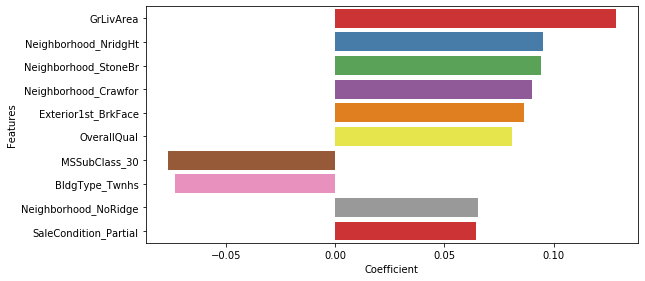

In [143]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(30,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = ridge_df1.head(10))
plt.show()

In [144]:
alpha = 0.002

lasso = Lasso(random_state=42,alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.09313545,  0.05029826,  0.02993834,  0.02536189,  0.03033549,
        0.02325171,  0.13019133,  0.03411332,  0.06162823, -0.04693145,
       -0.04661481, -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.00038725, -0.08178383,  0.00277487,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.05981657, -0.03961695, -0.        ,  0.        ,
        0.04887669,  0.        ,  0.03010548,  0.        ,  0.        ,
       -0.        , -0.        , -0.03692252, -0.02338465,  0.03697214,
       -0.00400181, -0.01414193,  0.        , -0.        ,  0.        ,
       -0.        ,  0.06986947, -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.02798066,  0.        , -0.        ,
        0.02502816, -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.01392353,  0.03

In [145]:
# Put the Features and coefficienst in a dataframe
lasso_df1 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df1['ABS Coefficients']=abs(lasso.coef_)
lasso_df1.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
lasso_df1.reset_index(drop=True, inplace=True)
lasso_df1

Features  Coefficient  ABS Coefficients
0                GrLivArea       0.1302          0.130191
1              OverallQual       0.0931          0.093135
2              MSZoning_RM      -0.0818          0.081784
3      Exterior1st_BrkFace       0.0699          0.069869
4               GarageCars       0.0616          0.061628
5     Neighborhood_Crawfor       0.0598          0.059817
6              OverallCond       0.0503          0.050298
7     Neighborhood_NridgHt       0.0489          0.048877
8                 BuiltAge      -0.0469          0.046931
9            MSSubClass_30      -0.0466          0.046615
10    Neighborhood_Edwards      -0.0396          0.039617
11       HouseStyle_1Story       0.0370          0.036972
12          BldgType_Twnhs      -0.0369          0.036923
13             FireplaceQu       0.0341          0.034113
14   SaleCondition_Partial       0.0332          0.033159
15            BsmtFinType1       0.0303          0.030335
16    Neighborhood_StoneBr       0.0301          0.030105
17                BsmtQual       0.0299          0.029938
18        Foundation_PConc       0.0280          0.027981
19            BsmtExposure       0.0254          0.025362
20       GarageType_Attchd       0.0250          0.025028
21         BldgType_TwnhsE      -0.0234          0.023385
22               HeatingQC       0.0233          0.023252
23         RoofStyle_Gable      -0.0141          0.014142
24    SaleCondition_Normal       0.0139          0.013924
25       HouseStyle_2Story      -0.0040          0.004002
26            LotShape_IR2       0.0028          0.002775
27             MSZoning_RL       0.0004          0.000387
28     Exterior2nd_CmentBd       0.0000          0.000000
29       Exterior2nd_Stone       0.0000          0.000000
30      Exterior2nd_CBlock      -0.0000          0.000000
31     Exterior2nd_AsphShn       0.0000          0.000000
32       Exterior1st_Stone       0.0000          0.000000
33       Exterior2nd_Other       0.0000          0.000000
34             MSZoning_FV       0.0000          0.000000
35      Exterior2nd_Stucco      -0.0000          0.000000
36     Exterior1st_ImStucc       0.0000          0.000000
37         Foundation_Slab       0.0000          0.000000
38         Foundation_Wood      -0.0000          0.000000
39      GarageType_Basment      -0.0000          0.000000
40      GarageType_BuiltIn       0.0000          0.000000
41       GarageType_Detchd      -0.0000          0.000000
42    GarageType_No Garage      -0.0000          0.000000
43  GarageFinish_No Garage      -0.0000          0.000000
44   SaleCondition_AdjLand       0.0000          0.000000
45    SaleCondition_Alloca       0.0000          0.000000
46     Exterior2nd_Wd Shng      -0.0000          0.000000
47       RoofStyle_Mansard       0.0000          0.000000
48      Exterior1st_CBlock      -0.0000          0.000000
49     Exterior1st_BrkComm      -0.0000          0.000000
50           MSSubClass_90      -0.0000          0.000000
51            LotShape_IR3      -0.0000          0.000000
52           LotConfig_FR2      -0.0000          0.000000
53           LotConfig_FR3      -0.0000          0.000000
54     Neighborhood_BrDale      -0.0000          0.000000
55    Neighborhood_BrkSide       0.0000          0.000000
56    Neighborhood_ClearCr       0.0000          0.000000
57           MSSubClass_75       0.0000          0.000000
58           MSSubClass_70       0.0000          0.000000
59    Neighborhood_MeadowV      -0.0000          0.000000
60    Neighborhood_NoRidge       0.0000          0.000000
61           MSSubClass_45      -0.0000          0.000000
62    Neighborhood_Somerst       0.0000          0.000000
63     Neighborhood_Timber       0.0000          0.000000
64    Neighborhood_Veenker       0.0000          0.000000
65         BldgType_Duplex      -0.0000          0.000000
66             MSZoning_RH      -0.0000          0.000000
67          RoofStyle_Shed      -0.0000          0.000000
68     Exterior1

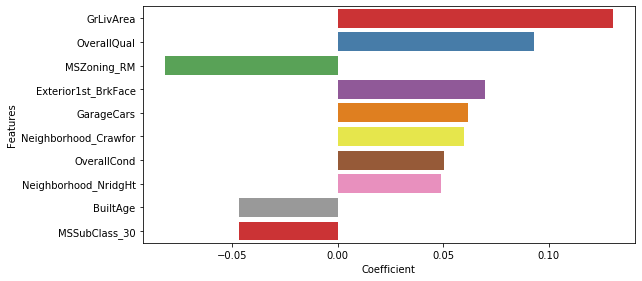

In [146]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(30,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = lasso_df1.head(10))
plt.show()

In [147]:
y_pred_train_lasso1 = lasso.predict(X_train)
y_pred_test_lasso1 = lasso.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso1)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso1)
print(r2_test_lr)
metric5.append(r2_test_lr)

0.8717858661139305
0.8900738215366044


In [148]:
lasso_df1[lasso_df1['ABS Coefficients'] > 0]

Features  Coefficient  ABS Coefficients
0               GrLivArea       0.1302          0.130191
1             OverallQual       0.0931          0.093135
2             MSZoning_RM      -0.0818          0.081784
3     Exterior1st_BrkFace       0.0699          0.069869
4              GarageCars       0.0616          0.061628
5    Neighborhood_Crawfor       0.0598          0.059817
6             OverallCond       0.0503          0.050298
7    Neighborhood_NridgHt       0.0489          0.048877
8                BuiltAge      -0.0469          0.046931
9           MSSubClass_30      -0.0466          0.046615
10   Neighborhood_Edwards      -0.0396          0.039617
11      HouseStyle_1Story       0.0370          0.036972
12         BldgType_Twnhs      -0.0369          0.036923
13            FireplaceQu       0.0341          0.034113
14  SaleCondition_Partial       0.0332          0.033159
15           BsmtFinType1       0.0303          0.030335
16   Neighborhood_StoneBr       0.0301          0.030105
17               BsmtQual       0.0299          0.029938
18       Foundation_PConc       0.0280          0.027981
19           BsmtExposure       0.0254          0.025362
20      GarageType_Attchd       0.0250          0.025028
21        BldgType_TwnhsE      -0.0234          0.023385
22              HeatingQC       0.0233          0.023252
23        RoofStyle_Gable      -0.0141          0.014142
24   SaleCondition_Normal       0.0139          0.013924
25      HouseStyle_2Story      -0.0040          0.004002
26           LotShape_IR2       0.0028          0.002775
27            MSZoning_RL       0.0004          0.000387

**Question 3:**  

- After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?  

**Answer**  

- The steps followed are:-
    1. The copy of training and test dataset were created for building new model    
    2. The top 5 predictor variables were removed from both dataset  
    3. Executed rfe with 70 in new dataset to obtain new list of features  
    4. Updated x-traina nd x-test with new rfe selected cols  
    5. Built new L1 model with optimal lambda as 0.001  
    6. Listed out top new predictor variables  

In [149]:
# creating copy of df_train for question 3
df_train_dup = df_train.copy()
df_train_dup.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
135       0.67473 -0.020006      0.64319     0.416829    1.065330   0.670264   
1452     -0.91512 -0.638544     -0.82429    -0.494482   -0.127521   0.670264   
1046      0.85138  0.500209      2.11067    -0.494482    0.606542  -0.752479   
691       1.52265  1.004145      2.84441     0.416829    6.123478  -3.597964   
435      -0.63248  0.004551      0.64319     0.416829   -0.586309  -0.752479   

      BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
135  -0.533302     -0.587292     -1.214901   -0.966615   1.643360   
1452  0.577925      2.210336      1.146892    0.210650  -1.286379   
1046  1.689151      1.277793      1.146892   -0.450082   2.649897   
691   1.689151      2.210336      1.146892    2.164868   0.935640   
435   0.577925      1.277793      1.146892   -0.138010  -1.129107   

      TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
135      0.533770  -0.157974 -0.795438   0.310528     -0.829310  0.787445   
1452    -1.158455  -0.157974 -0.795438  -0.861238      1.108277 -1.065046   
1046     2.071750   0.889374  1.215725   2.588747     -0.829310  2.639936   
691      3.082167   0.889374  3.502390   5.370249     -0.829310  2.639936   
435     -0.595125   0.889374  1.119299   0.270188      1.108277  0.787445   

      HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
135  -0.767504      0.143188    -0.772583    0.600163     1.198128   
1452 -0.767504     -1.075104    -0.772583   -0.947226    -1.005003   
1046  1.231531      1.361480     2.249668    0.600163     1.198128   
691   1.231531      1.361480     2.249668    2.147552     1.748911   
435   1.231531      0.143188     0.738542    0.600163     0.647345   

      GarageCars  WoodDeckSF  OpenPorchSF    MoSold  BuiltAge  LastSoldAge  \
135     0.290659    0.040535    -0.709823 -0.495751  0.054393    -0.150096   
1452    0.290659   -0.734969    -0.299767 -0.495751 -1.098468     1.352336   
1046    1.645741    0.958479     0.871819  0.254118 -1.098468     1.352336   
691     1.645741    2.287914     0.022419 -1.995488 -0.736140     0.601120   
435     0.290659    0.515334     0.183512 -0.870685 -0.802018    -0.901312   

      GarageAge  LastRemodAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
135    0.409846      0.710452              0              0              0   
1452  -0.931225     -0.973103              0              0              0   
1046  -0.931225     -1.021204              0              0              0   
691   -0.509746     -0.492087              0              0              0   
435   -0.586378     -0.540189              0              0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
135               0              0              0              0   
1452              0              0              0              0   
1046              0              1              0              0   
691               0              1              0              0   
435               0              1              0              0   

      MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
135               0              0              0               0   
1452              0              0              0               0   
1046              0              0              0               0   
691               0              0              0               0   
435               0              0              0               0   

      MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  \
135                0               0               0            0   
1452               0               1               0            0   
1046               0               0               0            0   
691                0               0               0            0   
435                0               0               0            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotS

In [150]:
# creating copy of df_test for question 3
df_test_dup = df_test.copy()
df_test_dup.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
1321     -1.40974 -0.367031    -2.291769     0.416829   -0.586309   0.670264   
836       1.02803 -0.231551    -0.824290     0.416829   -0.586309   0.670264   
413      -0.17319 -0.152451    -0.824290     0.416829   -0.586309   0.670264   
522      -0.38517 -0.516676    -0.090550     1.328141   -0.586309   0.670264   
1035     -1.40974  0.081167    -1.558029    -2.317105   -0.586309   0.670264   

      BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
1321 -3.866981     -1.519834     -1.687259   -0.966615  -1.286379   
836  -0.533302     -0.587292     -0.270184   -0.239164   1.456882   
413  -0.533302     -0.587292     -1.214901   -0.966615   0.978328   
522  -0.533302     -0.587292      0.674534   -0.107879   0.072894   
1035 -3.866981     -1.519834     -1.687259   -0.966615  -1.286379   

      TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
1321    -2.381239  -1.205323 -0.795438  -1.537404     -0.829310 -1.065046   
836      1.103806  -0.157974 -0.795438   0.074254      1.108277 -1.065046   
413     -0.127919  -0.157974 -0.795438  -0.945758     -0.829310 -1.065046   
522     -0.136861   0.889374  0.719822   0.275951     -0.829310  0.787445   
1035    -2.381239   0.889374 -0.795438  -1.297288     -0.829310 -1.065046   

      HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
1321 -0.767504     -1.075104    -0.772583   -0.947226    -1.005003   
836  -0.767504     -1.075104    -0.772583   -0.947226    -1.005003   
413  -0.767504     -1.075104    -0.772583    0.600163     1.198128   
522  -0.767504      0.143188    -0.772583    2.147552     1.198128   
1035 -0.767504      0.143188    -0.772583   -0.947226    -1.005003   

      GarageCars  WoodDeckSF  OpenPorchSF    MoSold  BuiltAge  LastSoldAge  \
1321   -1.064423   -0.734969    -0.709823  0.254118  0.746109    -0.150096   
836     0.290659   -0.734969     0.988978 -0.120816  0.779048     0.601120   
413     0.290659   -0.734969    -0.709823 -1.245619  1.470765    -1.652528   
522     0.290659   -0.734969    -0.358347  1.378921  0.811987     1.352336   
1035   -1.064423    0.736906    -0.709823 -1.995488  0.482598    -0.901312   

      GarageAge  LastRemodAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
1321   0.984590      1.672484              0              0              0   
836    1.252805      0.566147              1              0              0   
413    2.057447      1.672484              1              0              0   
522    1.176172      1.672484              0              0              0   
1035   0.907958      1.335773              0              0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
1321              0              0              0              0   
836               0              0              0              0   
413               0              0              0              0   
522               1              0              0              0   
1035              0              0              0              0   

      MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
1321              0              0              0               0   
836               0              0              0               0   
413               0              0              0               0   
522               0              0              0               0   
1035              0              0              0               0   

      MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  \
1321               0               0               0            0   
836                0               0               0            0   
413                0               0               0            0   
522                0               0               0            0   
1035               0               0               0            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotS

In [151]:
# updating new list of cols after removing top 5 predictor variables
col_del = ['GrLivArea','Neighborhood_StoneBr','Neighborhood_NridgHt','Neighborhood_Crawfor','Exterior1st_BrkFace']
new_col = df_train_dup.columns.tolist()
for col in col_del:
    new_col.remove(col)
    
print(new_col)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'BuiltAge', 'LastSoldAge', 'GarageAge', 'LastRemodAge', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Nei

In [152]:
# updatig df_train with new list of col
df_train_dup = df_train_dup[new_col] 
df_train_dup.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
135       0.67473 -0.020006      0.64319     0.416829    1.065330   0.670264   
1452     -0.91512 -0.638544     -0.82429    -0.494482   -0.127521   0.670264   
1046      0.85138  0.500209      2.11067    -0.494482    0.606542  -0.752479   
691       1.52265  1.004145      2.84441     0.416829    6.123478  -3.597964   
435      -0.63248  0.004551      0.64319     0.416829   -0.586309  -0.752479   

      BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
135  -0.533302     -0.587292     -1.214901   -0.966615   1.643360   
1452  0.577925      2.210336      1.146892    0.210650  -1.286379   
1046  1.689151      1.277793      1.146892   -0.450082   2.649897   
691   1.689151      2.210336      1.146892    2.164868   0.935640   
435   0.577925      1.277793      1.146892   -0.138010  -1.129107   

      TotalBsmtSF  HeatingQC  2ndFlrSF  BsmtFullBath  FullBath  HalfBath  \
135      0.533770  -0.157974 -0.795438     -0.829310  0.787445 -0.767504   
1452    -1.158455  -0.157974 -0.795438      1.108277 -1.065046 -0.767504   
1046     2.071750   0.889374  1.215725     -0.829310  2.639936  1.231531   
691      3.082167   0.889374  3.502390     -0.829310  2.639936  1.231531   
435     -0.595125   0.889374  1.119299      1.108277  0.787445  1.231531   

      BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  GarageCars  \
135       0.143188    -0.772583    0.600163     1.198128    0.290659   
1452     -1.075104    -0.772583   -0.947226    -1.005003    0.290659   
1046      1.361480     2.249668    0.600163     1.198128    1.645741   
691       1.361480     2.249668    2.147552     1.748911    1.645741   
435       0.143188     0.738542    0.600163     0.647345    0.290659   

      WoodDeckSF  OpenPorchSF    MoSold  BuiltAge  LastSoldAge  GarageAge  \
135     0.040535    -0.709823 -0.495751  0.054393    -0.150096   0.409846   
1452   -0.734969    -0.299767 -0.495751 -1.098468     1.352336  -0.931225   
1046    0.958479     0.871819  0.254118 -1.098468     1.352336  -0.931225   
691     2.287914     0.022419 -1.995488 -0.736140     0.601120  -0.509746   
435     0.515334     0.183512 -0.870685 -0.802018    -0.901312  -0.586378   

      LastRemodAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
135       0.710452              0              0              0   
1452     -0.973103              0              0              0   
1046     -1.021204              0              0              0   
691      -0.492087              0              0              0   
435      -0.540189              0              0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
135               0              0              0              0   
1452              0              0              0              0   
1046              0              1              0              0   
691               0              1              0              0   
435               0              1              0              0   

      MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
135               0              0              0               0   
1452              0              0              0               0   
1046              0              0              0               0   
691               0              0              0               0   
435               0              0              0               0   

      MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  \
135                0               0               0            0   
1452               0               1               0            0   
1046               0               0               0            0   
691                0               0               0            0   
435                0               0               0            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
135             0            1          

In [153]:
# updatig df_test with new list of col
df_test_dup = df_test_dup[new_col] 
df_test_dup.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
1321     -1.40974 -0.367031    -2.291769     0.416829   -0.586309   0.670264   
836       1.02803 -0.231551    -0.824290     0.416829   -0.586309   0.670264   
413      -0.17319 -0.152451    -0.824290     0.416829   -0.586309   0.670264   
522      -0.38517 -0.516676    -0.090550     1.328141   -0.586309   0.670264   
1035     -1.40974  0.081167    -1.558029    -2.317105   -0.586309   0.670264   

      BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
1321 -3.866981     -1.519834     -1.687259   -0.966615  -1.286379   
836  -0.533302     -0.587292     -0.270184   -0.239164   1.456882   
413  -0.533302     -0.587292     -1.214901   -0.966615   0.978328   
522  -0.533302     -0.587292      0.674534   -0.107879   0.072894   
1035 -3.866981     -1.519834     -1.687259   -0.966615  -1.286379   

      TotalBsmtSF  HeatingQC  2ndFlrSF  BsmtFullBath  FullBath  HalfBath  \
1321    -2.381239  -1.205323 -0.795438     -0.829310 -1.065046 -0.767504   
836      1.103806  -0.157974 -0.795438      1.108277 -1.065046 -0.767504   
413     -0.127919  -0.157974 -0.795438     -0.829310 -1.065046 -0.767504   
522     -0.136861   0.889374  0.719822     -0.829310  0.787445 -0.767504   
1035    -2.381239   0.889374 -0.795438     -0.829310 -1.065046 -0.767504   

      BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  GarageCars  \
1321     -1.075104    -0.772583   -0.947226    -1.005003   -1.064423   
836      -1.075104    -0.772583   -0.947226    -1.005003    0.290659   
413      -1.075104    -0.772583    0.600163     1.198128    0.290659   
522       0.143188    -0.772583    2.147552     1.198128    0.290659   
1035      0.143188    -0.772583   -0.947226    -1.005003   -1.064423   

      WoodDeckSF  OpenPorchSF    MoSold  BuiltAge  LastSoldAge  GarageAge  \
1321   -0.734969    -0.709823  0.254118  0.746109    -0.150096   0.984590   
836    -0.734969     0.988978 -0.120816  0.779048     0.601120   1.252805   
413    -0.734969    -0.709823 -1.245619  1.470765    -1.652528   2.057447   
522    -0.734969    -0.358347  1.378921  0.811987     1.352336   1.176172   
1035    0.736906    -0.709823 -1.995488  0.482598    -0.901312   0.907958   

      LastRemodAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
1321      1.672484              0              0              0   
836       0.566147              1              0              0   
413       1.672484              1              0              0   
522       1.672484              0              0              0   
1035      1.335773              0              0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
1321              0              0              0              0   
836               0              0              0              0   
413               0              0              0              0   
522               1              0              0              0   
1035              0              0              0              0   

      MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
1321              0              0              0               0   
836               0              0              0               0   
413               0              0              0               0   
522               0              0              0               0   
1035              0              0              0               0   

      MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  \
1321               0               0               0            0   
836                0               0               0            0   
413                0               0               0            0   
522                0               0               0            0   
1035               0               0               0            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
1321            0            1          

In [154]:
# creating new x-train and x-test after removing the 5 given cols
X_train_new = df_train_dup
X_test_new = df_test_dup

print(X_train_new.shape,'\n',X_test_new.shape)

(1021, 146) 
 (438, 146)


In [155]:
# running rfe with updated 70 features
rfe = RFE(lm, 70)             
rfe = rfe.fit(X_train_new, y_train)

In [156]:
# rfe selected col
X_train_new.columns[rfe.support_]

Index(['OverallQual', 'OverallCond', 'BsmtFinType1', 'TotalBsmtSF', '2ndFlrSF',
       'KitchenQual', 'FireplaceQu', 'GarageCars', 'MSSubClass_30',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_90', 'MSSubClass_120',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofS

In [157]:
# updating train and test with rfe selected col
X_train_new = X_train_new[X_train_new.columns[rfe.support_]]
X_test_new = X_test_new[X_test_new.columns[rfe.support_]]

print(X_train_new.shape,'\n',X_test_new.shape)

(1021, 70) 
 (438, 70)


In [158]:
# check the new coefficient values with lambda = 0.001

alpha = 0.001

lasso_new = Lasso(random_state=42, alpha=alpha)
        
lasso_new.fit(X_train_new, y_train) 
lasso_new.coef_

array([ 0.10840496,  0.04442094,  0.03671286,  0.07497164,  0.11299668,
        0.03663402,  0.04202798,  0.0760213 , -0.12883577,  0.        ,
        0.0130102 ,  0.        , -0.03888594,  0.00803427, -0.        ,
        0.03250179, -0.06426746,  0.03722806, -0.        ,  0.05157561,
       -0.        , -0.        , -0.        ,  0.        , -0.01723772,
       -0.06770586, -0.01366838, -0.03098438, -0.        , -0.        ,
       -0.02869652, -0.        , -0.00882771, -0.05933371, -0.        ,
       -0.00896142, -0.        ,  0.        ,  0.        ,  0.        ,
       -0.04589675, -0.01306481,  0.06640186, -0.05510701,  0.        ,
        0.02140154,  0.        , -0.        , -0.        , -0.        ,
       -0.02695647,  0.        , -0.        ,  0.        , -0.01146699,
       -0.        , -0.        , -0.        ,  0.        ,  0.00225253,
       -0.03393185,  0.        ,  0.04302549, -0.        , -0.        ,
       -0.05149318,  0.        ,  0.12859828,  0.04515385,  0.08

In [159]:
# Put the new shortlisted Features and coefficienst in a dataframe
lasso_df2=pd.DataFrame()
lasso_df2['Features'] = X_train_new.columns
lasso_df2['Coefficients']=lasso_new.coef_
lasso_df2['ABS Coefficients'] = abs(lasso_new.coef_)
lasso_df2.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
lasso_df2

Features  Coefficients  ABS Coefficients
8            MSSubClass_30     -0.128836          0.128836
67    SaleCondition_Alloca      0.128598          0.128598
4                 2ndFlrSF      0.112997          0.112997
0              OverallQual      0.108405          0.108405
69   SaleCondition_Partial      0.089003          0.089003
7               GarageCars      0.076021          0.076021
3              TotalBsmtSF      0.074972          0.074972
25    Neighborhood_Edwards     -0.067706          0.067706
42       HouseStyle_1Story      0.066402          0.066402
16             MSZoning_RM     -0.064267          0.064267
33    Neighborhood_OldTown     -0.059334          0.059334
43       HouseStyle_2Story     -0.055107          0.055107
19       LotConfig_CulDSac      0.051576          0.051576
65        GarageFinish_Unf     -0.051493          0.051493
40          BldgType_Twnhs     -0.045897          0.045897
68    SaleCondition_Normal      0.045154          0.045154
1              OverallCond      0.044421          0.044421
62        Foundation_PConc      0.043025          0.043025
6              FireplaceQu      0.042028          0.042028
12          MSSubClass_120     -0.038886          0.038886
17            LotShape_IR2      0.037228          0.037228
2             BsmtFinType1      0.036713          0.036713
5              KitchenQual      0.036634          0.036634
60      Exterior2nd_Stucco     -0.033932          0.033932
15             MSZoning_RL      0.032502          0.032502
27     Neighborhood_IDOTRR     -0.030984          0.030984
30      Neighborhood_NAmes     -0.028697          0.028697
50     Exterior1st_HdBoard     -0.026956          0.026956
45         HouseStyle_SLvl      0.021402          0.021402
24    Neighborhood_CollgCr     -0.017238          0.017238
26    Neighborhood_Gilbert     -0.013668          0.013668
41       HouseStyle_1.5Unf     -0.013065          0.013065
10           MSSubClass_70      0.013010          0.013010
54     Exterior1st_Wd Sdng     -0.011467          0.011467
35     Neighborhood_Sawyer     -0.008961          0.008961
32     Neighborhood_NWAmes     -0.008828          0.008828
13             MSZoning_FV      0.008034          0.008034
59     Exterior2nd_Plywood      0.002253          0.002253
34      Neighborhood_SWISU     -0.000000          0.000000
61     Exterior2nd_Wd Sdng      0.000000          0.000000
55     Exterior1st_WdShing     -0.000000          0.000000
56     Exterior2nd_Brk Cmn     -0.000000          0.000000
57      Exterior2nd_CBlock     -0.000000          0.000000
58     Exterior2nd_ImStucc      0.000000          0.000000
18            LotShape_IR3     -0.000000          0.000000
14             MSZoning_RH     -0.000000          0.000000
53     Exterior1st_VinylSd      0.000000          0.000000
63    GarageType_No Garage     -0.000000          0.000000
64  GarageFinish_No Garage     -0.000000          0.000000
66   SaleCondition_AdjLand      0.000000          0.000000
11           MSSubClass_90      0.000000          0.000000
9            MSSubClass_60      0.000000          0.000000
20           LotConfig_FR3     -0.000000          0.000000
52     Exterior1st_Plywood     -0.000000          0.000000
36    Neighborhood_SawyerW     -0.000000          0.000000
51     Exterior1st_ImStucc      0.000000          0.000000
21    Neighborhood_Blueste     -0.000000          0.000000
49      Exterior1st_CBlock     -0.000000          0.000000
48     Exterior1st_BrkComm     -0.000000          0.000000
47          RoofStyle_Shed     -0.000000          0.000000
46       RoofStyle_Mansard      0.000000          0.000000
22     Neighborhood_BrDale     -0.000000          0.000000
44       HouseStyle_SFoyer      0.000000          0.000000
23    Neighborhood_BrkSide      0.000000          0.000000
28    Neighborhood_MeadowV     -0.000000          0.000000
29    Neighborhood_Mitchel     -0.000000          0.000000
31    Neighborhood_NPkVill     -0.000000          0.000000
39    

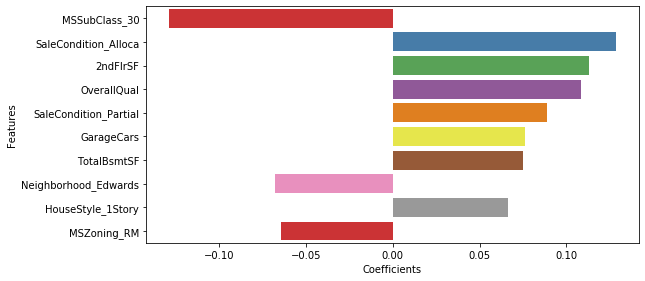

In [160]:
#bar plot to determine the new variables that would affect pricing most using lasso regression

plt.figure(figsize=(30,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficients', palette='Set1', data = lasso_df2.head(10))
plt.show()